## Table of Contents
- [Import libraries](#1)
- [Download tables](#2)
- [Process tables](#3)
- [Download plots](#4)
- [Download plots with log10](#5)
- [Story of coordinates](#6)
- [Story of coordinates (log10)](#7)
- [Story of coordinates audit](#8)

<a name='1'></a>
## Import libraries

The script is focused on setting up an environment for data analysis and visualization. It imports a suite of libraries and modules that are essential for statistical computing, data manipulation, progress tracking, file system operations, and generating visualizations such as plots and Venn diagrams. The specific libraries imported include pandas for data structures, numpy for numerical operations, tqdm for progress bars, glob for file path retrieval, os for operating system interaction, matplotlib and seaborn for plotting and graphical representations, and matplotlib_venn for creating Venn diagrams.

Additionally, the script modifies the system path to include a custom directory, which suggests that the script will use additional custom modules and configuration settings located in this directory. These custom modules, imported with wildcard imports (from config import * and from functions import *)

In [1]:
# %load /cluster/home/myurchikova/github/projects2020_ohsu/eth/learning_Master_thesis/TASKS/func/base_imports.py
import pandas as pd
import numpy as np
import tqdm 
import glob
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import tarfile
import re
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
import sys
sys.path.append(r"/cluster/home/prelotla/github/projects2020_ohsu/eth/MY_Master_thesis_rerun_LP/TASKS/func/")
%load_ext autoreload
%autoreload 2
from config import *
from functions import *

Matplotlib created a temporary config/cache directory at /scratch/slurm-job.4866055/matplotlib-qq3_moff because the default path (/cluster/customapps/biomed/grlab/users/prelotla/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


### Define order of experiments

In [2]:
# Define order 
order_background = ['01', '12', '1X', '1A', '32', '3X', '3A']
order_foreground = ['025', '021', '0A5', '0A1', '0AN']

<a name='2'></a>
## Download tables

The code snippet is Python code that uses the pandas library to read two CSV files into DataFrame objects. The pd.read_csv() function is utilized for this purpose, with specified file paths that are constructed using string formatting and variables representing directories and file names. The variables like {SAVE_DIR}, {DIR_CSV}, {DIR_BRCA}, {NAME_TABLES}, {NAME_NON_FILTERING_BRCA}, and {NAME_FILTERING_BRCA} suggest that the file paths are being built dynamically, possibly to handle different datasets or data configurations.

The files are read with specific parameters: sep="\t" indicates that the separator between values in the CSV files is a tab character, which is typical for TSV (Tab-Separated Values) files rather than comma-separated values. The low_memory=False parameter is set to avoid potential low memory warnings when processing large files or files with mixed data types.

Two DataFrames are created as a result: out_df_original and out_df_filtered, which refer to the original dataset and a filtered version of it, respectively.

In [3]:
READ_DIR='/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/202301_myurchikova_MT'

In [4]:
out_df_original = pd.read_csv(f'{READ_DIR}/{DIR_CSV}/{DIR_BRCA}/{NAME_TABLES}/{NAME_NON_FILTERING_BRCA}', sep="\t",low_memory=False)
out_df_filtered = pd.read_csv(f'{READ_DIR}/{DIR_CSV}/{DIR_BRCA}/{NAME_TABLES}/OHSU_BRCA_NEW/{NAME_FILTERING_BRCA}', sep=";",low_memory=False)

In [19]:
f'{READ_DIR}/{DIR_CSV}/{DIR_BRCA}/{NAME_TABLES}/{NAME_NON_FILTERING_BRCA}'


'/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/202301_myurchikova_MT/DATA/BRCA/TABLES/out_df_non_filtering_BRCA.csv'

In [20]:
f'{READ_DIR}/{DIR_CSV}/{DIR_BRCA}/{NAME_TABLES}/OHSU_BRCA_NEW/{NAME_FILTERING_BRCA}'

'/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/202301_myurchikova_MT/DATA/BRCA/TABLES/OHSU_BRCA_NEW/out_df_filtering_BRCA.csv'

<a name='3'></a>
## Process tables

It updates the configuration parameters of the matplotlib library to set the font size. The command matplotlib.rcParams.update({'font.size': 4}) modifies the default settings for the font size to 4. This affects all subsequent plots created using matplotlib where no other font size is specified.
It imports the math module, which provides access to higher-level mathematical functions and constants. This is a standard Python module commonly used for performing mathematical calculations.

In [5]:
# Import requirements for fonts

matplotlib.rcParams.update({'font.size':4})
import math

The code snippet in the image outlines a process for manipulating and saving data tables using the pandas library in Python. It starts by assigning two DataFrames, out_df_filtered and out_df_original, to new variables, first_df and second_df, respectively. A third DataFrame, final_df, is then created as a copy of first_df.

A new column is added to the out_df_filtered DataFrame, labeled 'sum', which appears to store the sum of several other columns in the DataFrame. These columns include 'size_intersection_coor', 'size_ohsueth_coor', and 'size_ethohsu_coor', though the exact nature of these columns is not clear from the snippet provided.

Afterwards, a file path is constructed using a function create_path.create_path() with several variables that likely define different parts of the file path. Finally, the final_df DataFrame is written to a CSV file using the to_csv() method, with tab as the separator and the header included.

In [6]:
SAVE_DIR

'/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/202301_myurchikova_MT_rerun_LP'

In [7]:
# # Processing tables & save tables
first_df=out_df_filtered
second_df=out_df_original
final_df = first_df

# Adding sum for simple filtration
out_df_filtered.insert(loc=4,column='sum',value=final_df['size_intersection_coor']+final_df['size_ohsu\eth_coor']+final_df['size_eth\ohsu_coor'])

final_path = create_path.create_path(SAVE_DIR,[DIR_CSV,DIR_BRCA,NAME_TABLES,'OHSU_BRCA_NEW',NAME_FINAL_BRCA])

final_df.to_csv(final_path,header=True,sep='\t')

<a name='4'></a>
## Plotting plots

Assignment of data to pandas DataFrames and the creation of a final DataFrame as a copy for further manipulation.
Addition of new calculated columns, which suggest an aggregation or summarization of data, indicative of data analysis steps.
Application of filters to DataFrames to focus on specific data subsets based on certain conditions or thresholds.
Sorting and other data processing operations, including the creation of lists from DataFrame columns, which implies preparation for analysis or visualization.
Implementation of conditional logic to handle data based on predefined scenarios, possibly representing different analysis paths or experimental conditions.
Generation of file paths for saving outputs, indicating the handling of multiple datasets or output types.
Use of custom plotting functions to visualize data comparisons, likely resulting in bar plots.
Saving the processed data and plots to files

GP+P
GP+P
FFF  27778 11
SALT set()
Came from OHSU Inter non-filtered 0A512GA:
0
Came from OHSU non-filtered 0A512GA:
11

FFF  27778 922
SALT set()
Came from OHSU Inter non-filtered 0AN1AGA:
0
Came from OHSU non-filtered 0AN1AGA:
922

FFF  27778 42
SALT set()
Came from OHSU Inter non-filtered 0A53AGA:
1
Came from OHSU non-filtered 0A53AGA:
41

FFF  27778 20
SALT set()
Came from OHSU Inter non-filtered 02112GA:
0
Came from OHSU non-filtered 02112GA:
20

FFF  27778 1346
SALT set()
Came from OHSU Inter non-filtered 0AN3XGA:
1
Came from OHSU non-filtered 0AN3XGA:
1345

FFF  27778 922
SALT set()
Came from OHSU Inter non-filtered 0AN1XGA:
0
Came from OHSU non-filtered 0AN1XGA:
922

FFF  27778 67
SALT set()
Came from OHSU Inter non-filtered 0A101GA:
0
Came from OHSU non-filtered 0A101GA:
67

FFF  27778 1082
SALT set()
Came from OHSU Inter non-filtered 0AN32GA:
0
Came from OHSU non-filtered 0AN32GA:
1082

FFF  27778 275
SALT set()
Came from OHSU Inter non-filtered 0A13AGA:
2
Came from OHSU non-

<Figure size 640x480 with 0 Axes>

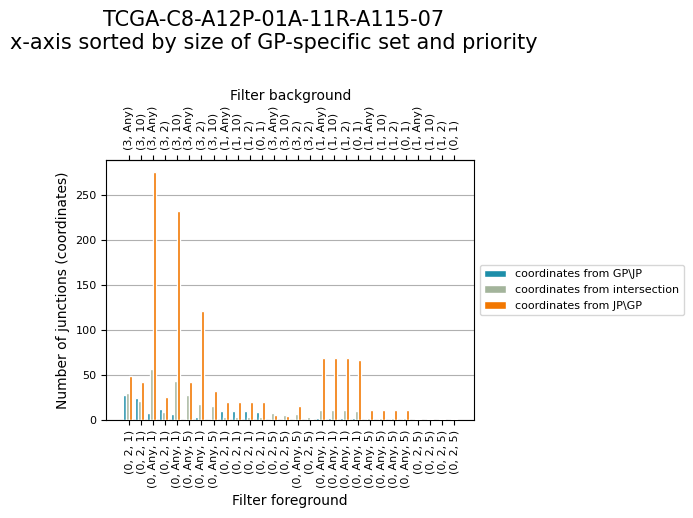

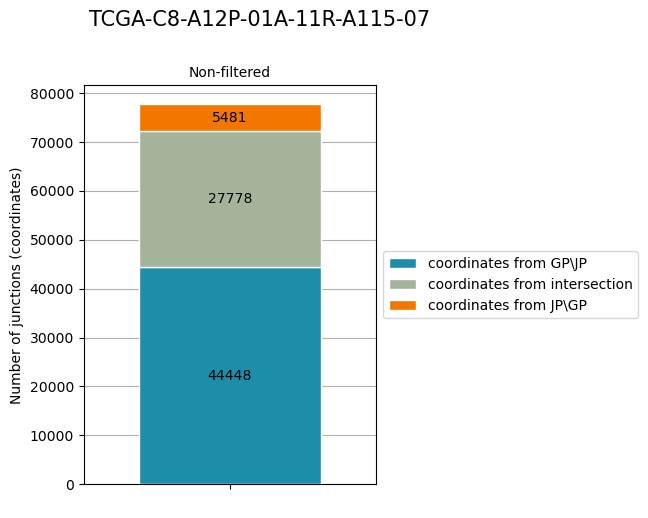

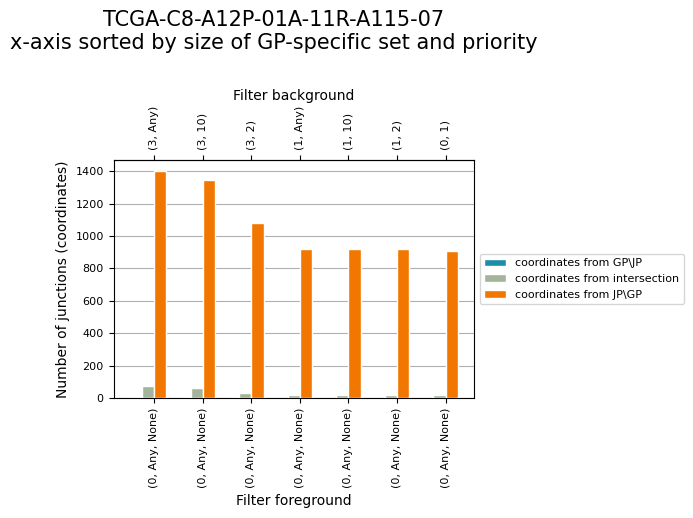

GP+P
GP+P
FFF  18727 25
SALT set()
Came from OHSU Inter non-filtered 0A11XGA:
0
Came from OHSU non-filtered 0A11XGA:
25

FFF  18727 436
SALT set()
Came from OHSU Inter non-filtered 0AN12GA:
1
Came from OHSU non-filtered 0AN12GA:
435

FFF  18727 1
SALT {'set()'}
Came from OHSU Inter non-filtered 02501GA:
0
Came from OHSU non-filtered 02501GA:
0

FFF  18727 436
SALT set()
Came from OHSU Inter non-filtered 0AN1AGA:
1
Came from OHSU non-filtered 0AN1AGA:
435

FFF  18727 436
SALT set()
Came from OHSU Inter non-filtered 0AN1XGA:
1
Came from OHSU non-filtered 0AN1XGA:
435

FFF  18727 1
SALT set()
Came from OHSU Inter non-filtered 0A51AGA:
0
Came from OHSU non-filtered 0A51AGA:
1

FFF  18727 89
SALT set()
Came from OHSU Inter non-filtered 0A13XGA:
2
Came from OHSU non-filtered 0A13XGA:
87

FFF  18727 591
SALT set()
Came from OHSU Inter non-filtered 0AN3XGA:
4
Came from OHSU non-filtered 0AN3XGA:
587

FFF  18727 14
SALT set()
Came from OHSU Inter non-filtered 0A53XGA:
1
Came from OHSU non-filte

<Figure size 640x480 with 0 Axes>

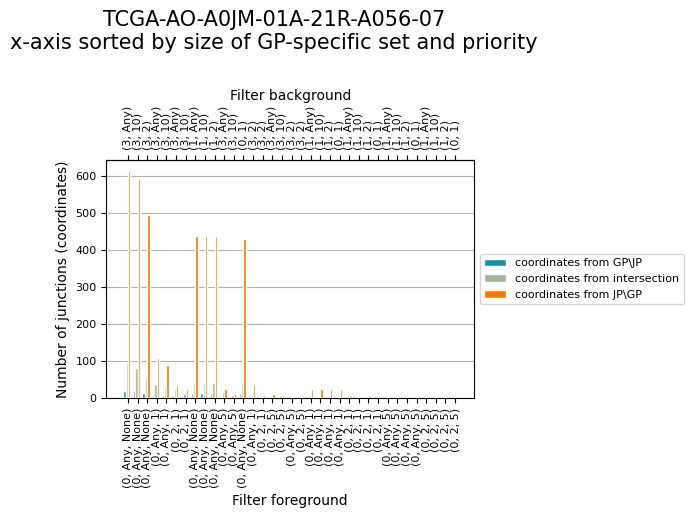

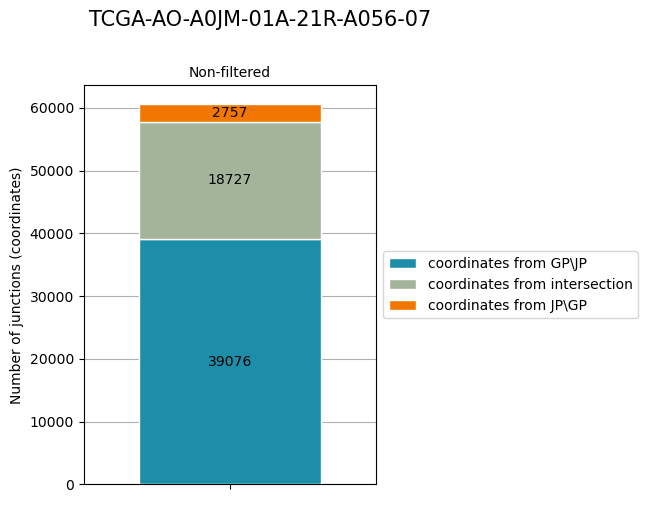

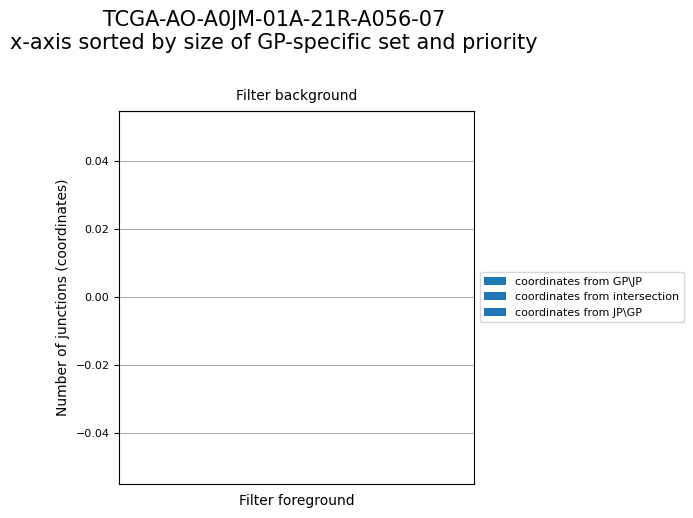

GP+P
GP+P
FFF  38484 16
SALT set()
Came from OHSU Inter non-filtered 02101GA:
0
Came from OHSU non-filtered 02101GA:
16

FFF  38484 1
SALT {'set()'}
Came from OHSU Inter non-filtered 02512GA:
0
Came from OHSU non-filtered 02512GA:
0

FFF  38484 1
SALT {'set()'}
Came from OHSU Inter non-filtered 02501GA:
0
Came from OHSU non-filtered 02501GA:
0

FFF  38484 1
SALT {'set()'}
Came from OHSU Inter non-filtered 0251XGA:
0
Came from OHSU non-filtered 0251XGA:
0

FFF  38484 1094
SALT set()
Came from OHSU Inter non-filtered 0AN3AGA:
10
Came from OHSU non-filtered 0AN3AGA:
1084

FFF  38484 17
SALT set()
Came from OHSU Inter non-filtered 0211XGA:
0
Came from OHSU non-filtered 0211XGA:
17

FFF  38484 15
SALT set()
Came from OHSU Inter non-filtered 0A532GA:
0
Came from OHSU non-filtered 0A532GA:
15

FFF  38484 38
SALT set()
Came from OHSU Inter non-filtered 0213XGA:
1
Came from OHSU non-filtered 0213XGA:
37

FFF  38484 1022
SALT set()
Came from OHSU Inter non-filtered 0AN3XGA:
6
Came from OHSU non-

<Figure size 640x480 with 0 Axes>

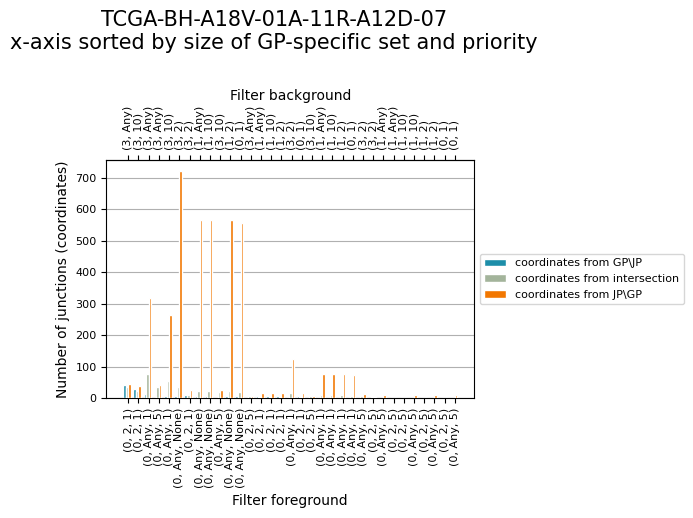

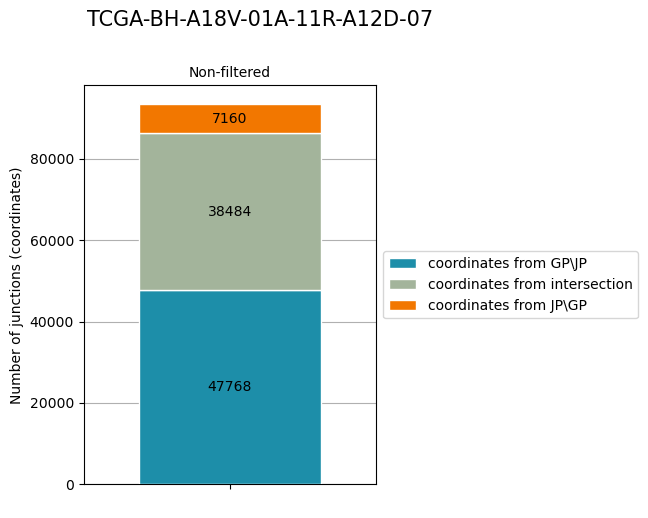

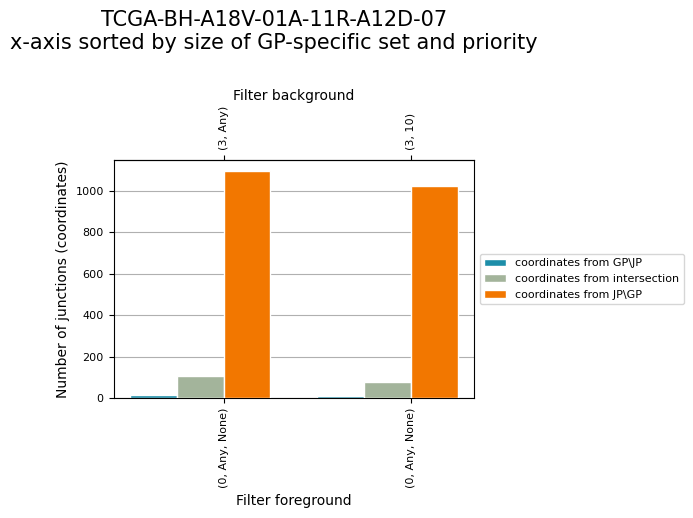

GP+P
GP+P
FFF  31675 6
SALT set()
Came from OHSU Inter non-filtered 02501GA:
0
Came from OHSU non-filtered 02501GA:
6

FFF  31675 11
SALT set()
Came from OHSU Inter non-filtered 0A501GA:
0
Came from OHSU non-filtered 0A501GA:
11

FFF  31675 6
SALT set()
Came from OHSU Inter non-filtered 0251AGA:
0
Came from OHSU non-filtered 0251AGA:
6

FFF  31675 550
SALT set()
Came from OHSU Inter non-filtered 0AN12GA:
1
Came from OHSU non-filtered 0AN12GA:
549

FFF  31675 8
SALT set()
Came from OHSU Inter non-filtered 0253XGA:
0
Came from OHSU non-filtered 0253XGA:
8

FFF  31675 272
SALT set()
Came from OHSU Inter non-filtered 0A13AGA:
1
Came from OHSU non-filtered 0A13AGA:
271

FFF  31675 15
SALT set()
Came from OHSU Inter non-filtered 02112GA:
0
Came from OHSU non-filtered 02112GA:
15

FFF  31675 40
SALT set()
Came from OHSU Inter non-filtered 0213AGA:
0
Came from OHSU non-filtered 0213AGA:
40

FFF  31675 11
SALT set()
Came from OHSU Inter non-filtered 0A51AGA:
0
Came from OHSU non-filtered 0A51AG

<Figure size 640x480 with 0 Axes>

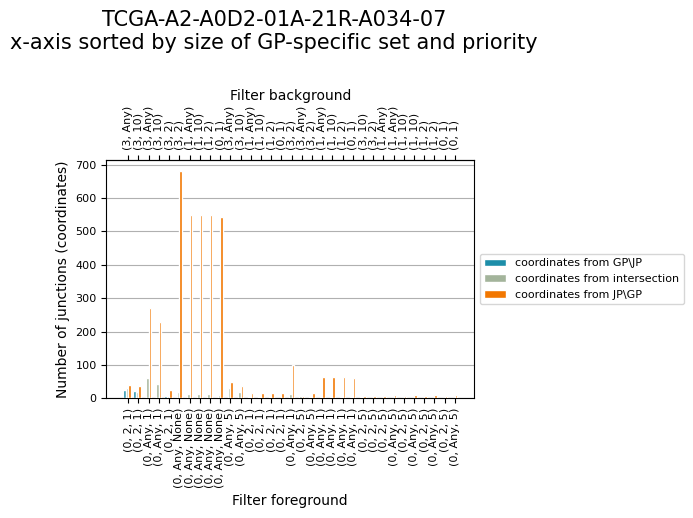

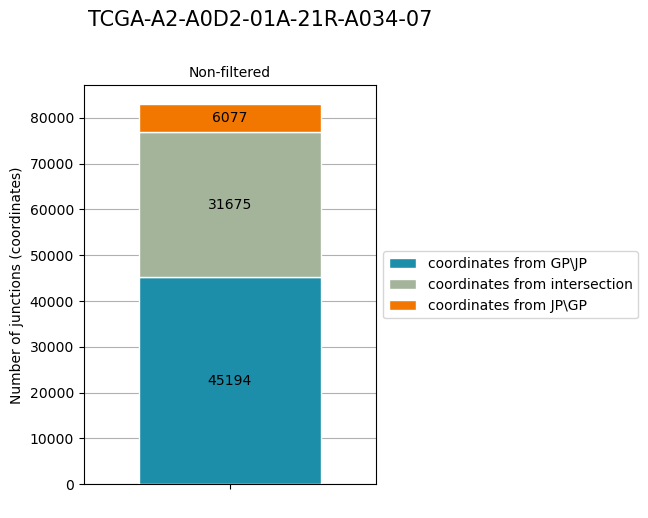

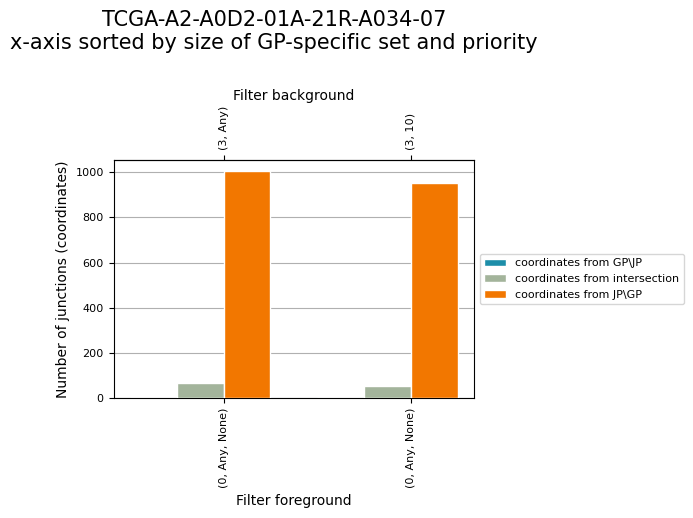

GP+P
GP+P
FFF  37613 64
SALT set()
Came from OHSU Inter non-filtered 0A11XGA:
1
Came from OHSU non-filtered 0A11XGA:
63

FFF  37613 2
SALT set()
Came from OHSU Inter non-filtered 02532GA:
0
Came from OHSU non-filtered 02532GA:
2

FFF  37613 10
SALT set()
Came from OHSU Inter non-filtered 0A512GA:
1
Came from OHSU non-filtered 0A512GA:
9

FFF  37613 890
SALT set()
Came from OHSU Inter non-filtered 0AN3XGA:
4
Came from OHSU non-filtered 0AN3XGA:
886

FFF  37613 66
SALT set()
Came from OHSU Inter non-filtered 0A53AGA:
2
Came from OHSU non-filtered 0A53AGA:
64

FFF  37613 526
SALT set()
Came from OHSU Inter non-filtered 0AN1AGA:
3
Came from OHSU non-filtered 0AN1AGA:
523

FFF  37613 7
SALT set()
Came from OHSU Inter non-filtered 0253XGA:
0
Came from OHSU non-filtered 0253XGA:
7

FFF  37613 48
SALT set()
Came from OHSU Inter non-filtered 0A53XGA:
2
Came from OHSU non-filtered 0A53XGA:
46

FFF  37613 12
SALT set()
Came from OHSU Inter non-filtered 02101GA:
1
Came from OHSU non-filtered 02101

<Figure size 640x480 with 0 Axes>

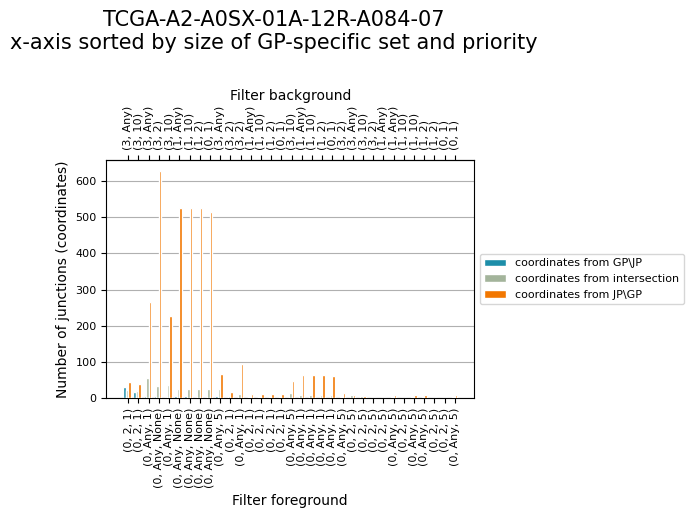

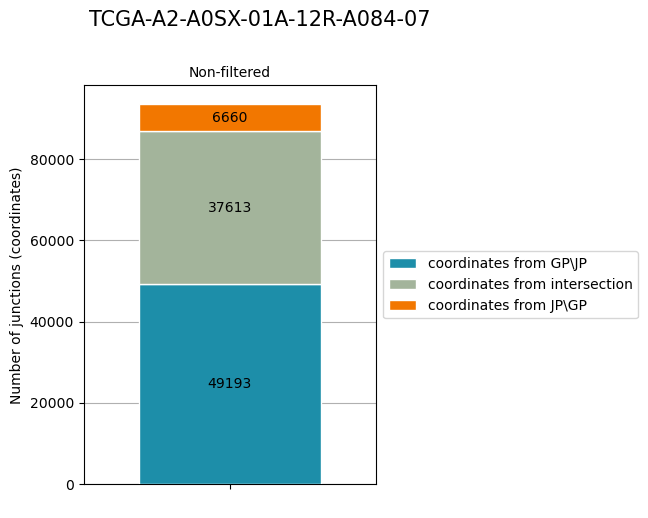

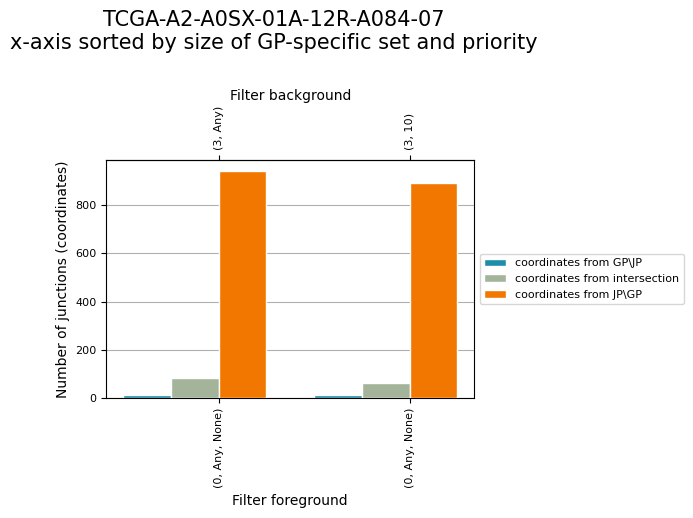

In [8]:
first_df=out_df_filtered
second_df=out_df_original

final_df = first_df
final_path = create_path.create_path(SAVE_DIR,[DIR_CSV,DIR_BRCA,NAME_TABLES,'OHSU_BRCA_NEW',NAME_FINAL_BRCA])

final_df.to_csv(final_path,header=True,sep='\t')
diff_tab=pd.DataFrame()
# Processing data and drawing grahs for each sample
for sample in RESTRICTS_BRCA:
    
    # Download colums from tables
    data_df=final_df.loc[final_df['sample']==sample]
    data1_df = data_df.loc[final_df['sum']<800]
    data2_df = data_df.loc[final_df['sum']>=800]
    data1_df=table_processing.sorting(data1_df)
    data2_df=table_processing.sorting(data2_df)
    inter_first=list(data1_df['size_intersection_coor'])
    s_ETH_first=list(data1_df['size_eth\ohsu_coor'])
    s_OHSU_first=list(data1_df['size_ohsu\eth_coor'])
    filter_foreground_first = list(data1_df['filter_foreground'])
    filter_background_first = list(data1_df['filter_background'])
    
    ## Get data to compare 
    inter2=list(second_df['size_intersection_coor'].loc[(second_df['sample']==sample)])
    s_ETH2=list(second_df['size_eth\ohsu_coor'].loc[(second_df['sample']==sample)])
    s_OHSU2=list(second_df['size_ohsu\eth_coor'].loc[(second_df['sample']==sample)])
    filfor2 = ['']
    filbac2 = ['']
    if STORY_OF_FILTER_COOR == 'intersection':
        inter2_df=out_df_original['inter_coor'].loc[(out_df_original['sample']==sample)]
        name='Intersection'
    elif STORY_OF_FILTER_COOR == 'ohsu':
        inter2_df=out_df_original['ohsu_coor\eth_coor'].loc[(out_df_original['sample']==sample)]
        name ='OHSU/ETH'

    inter2_df=out_df_original['inter_coor'].loc[(out_df_original['sample']==sample)]
    OHSU_2_df=out_df_original['ohsu_coor\eth_coor'].loc[(out_df_original['sample']==sample)]
    ETH_2_df=out_df_original['eth_coor\ohsu_coor'].loc[(out_df_original['sample']==sample)]

    # Get the data for the story of a coordinate
    inter_nf=inter2_df.iloc[0]
    ohsu_nf=OHSU_2_df.iloc[0]
    eth_nf=ETH_2_df.iloc[0]
    inter_nf=inter_nf.replace('"','').replace("[","").replace("]","").replace("'","").replace("{","").replace("}","").split(', ')
    ohsu_nf=ohsu_nf.replace('"','').replace("[","").replace("]","").replace("'","").replace("{","").replace("}","").split(', ')
    eth_nf=eth_nf.replace('"','').replace("[","").replace("]","").replace("'","").replace("{","").replace("}","").split(', ')
    eth_nf=table_processing.separate_ETH_3exons(eth_nf) # Make a correction on ETH - ISSUE THE intersection non filtered is not fully correct



    inter_second=list(data2_df['size_intersection_coor'])
    s_ETH_second=list(data2_df['size_eth\ohsu_coor'])
    s_OHSU_second=list(data2_df['size_ohsu\eth_coor'])
    filter_foreground_second = list(data2_df['filter_foreground'])
    filter_background_second = list(data2_df['filter_background'])
    
    ySalt=''
    OSHU=out_df_filtered['ohsu_coor\eth_coor'].loc[(out_df_filtered['sample']==sample)]
    ETH=out_df_filtered['eth_coor\ohsu_coor'].loc[(out_df_filtered['sample']==sample)]
    
    len_ohsu = [len(ohsu_list) for ohsu_list in OSHU]

    # Get data to compare
    f=final_df.loc[(final_df['sample']==sample)]['filter']
    #NF-non-filtered
    tab={
         'sample':[],
         'filter':[],
         'JP from Inter NF':[],
         'JP from JP NF':[],
         'GP from Inter NF':[],
         'GP from GP NF':[],
         'ff':out_df_filtered.loc[out_df_filtered['sample']==sample]['filter_foreground'], #final_df.loc[final_df['sample']==sample]['filter_foreground'],
         'fb':out_df_filtered.loc[out_df_filtered['sample']==sample]['filter_background'] #final_df.loc[final_df['sample']==sample]['filter_background'],
         }
    # Conver Aray in DF to DF structure and compare intersection coordinates in filter with intersection coordinates without filter
    for ohsu, filter in zip(OSHU, f):
        ohsu=ohsu.replace('"','').replace("{","").replace("}","").replace("[","").replace("]","").replace("'","").split(', ')
        print("FFF ",len(inter_nf), len(ohsu))
        inter_d=len(inter_d_set:=(set(ohsu) & set(inter_nf)))
        ohsu_d=len(ohsu_d_set:=(set(ohsu) & set(ohsu_nf)))
        ohsu_out=list(set(ohsu).difference(inter_d_set))
        inter_out=list(set(ohsu).difference(ohsu_d_set))
        tab['sample'].append(sample)
        tab['filter'].append(filter)
        tab['JP from Inter NF'].append(inter_d)
        tab['JP from JP NF'].append(ohsu_d)
        salt=set(ohsu).difference(set(ohsu_nf))
        print(f'SALT {salt.difference(set(inter_nf))}')
        print(f'Came from OHSU Inter non-filtered {filter}:\n{inter_d}\nCame from OHSU non-filtered {filter}:\n{ohsu_d}\n')
    
    for eth, filter in zip(ETH, f):
        eth=eth.replace('"','').replace("}","").replace("{","").replace("[","").replace("]","").replace("'","").split(', ')
        eth=table_processing.separate_ETH_3exons(eth) # Make a correction on ETH
        print("OOO ",len(inter_nf), len(eth))
        inter_d=len(inter_d_set:=(set(eth) & set(inter_nf)))
        eth_d=len(eth_d_set:=(set(eth) & set(eth_nf)))
        eth_out=list(set(eth).difference(inter_d_set))
        inter_out=list(set(eth).difference(eth_d_set))
        tab['GP from Inter NF'].append(inter_d)
        tab['GP from GP NF'].append(eth_d)
        salt=set(eth).difference(set(eth_nf))
        print(f'SALT {salt.difference(set(inter_nf))}')
        print(f'Came from ETH Inter non-filtered {filter}:\n{inter_d}\nCame from ETH non-filtered {filter}:\n{eth_d}\n')
    tab=pd.DataFrame(tab)
    diff_tab=pd.concat([diff_tab,tab])
    
    l_first=len(s_ETH_first)
    l_second=len(s_ETH_second)
    filfor_first = table_processing.get_filter(filter_foreground_first)
    filbac_first = table_processing.get_filter(filter_background_first)
    filfor_second = table_processing.get_filter(filter_foreground_second)
    filbac_second = table_processing.get_filter(filter_background_second)

            
    # Combining filters for graph indexing
    
    fffb_first=[]
    for i in range(len(filfor_first)):
          fffb_first.append(filfor_first[i]+' '+filbac_first[i])
       
    fffb2=[]
    for i in range(len(filfor2)):
          fffb2.append(filfor2[i]+' '+filbac2[i])

    fffb_second=[]
    for i in range(len(filfor_second)):
          fffb_second.append(filfor_second[i]+' '+filbac_second[i])

    
    # Frame structure building
    name = ['coordinates from GP\JP','coordinates from intersection','coordinates from JP\GP']

    v_first= [s_ETH_first,inter_first, s_OHSU_first]
    v_second=[s_ETH_second,inter_second,s_OHSU_second]

    
    axis2 = {
            'coordinates from GP\JP':s_ETH2,
            'coordinates from intersection':inter2,
            'coordinates from JP\GP':s_OHSU2
            }
    
    lg_first = len(filfor_first)
    lg2 = len(filfor2)
    lg_second = len(filfor_second)
    #Plotting sample data
    
    x_main = filfor_first
    x_secondary_first = filbac_first
    x_secondary2 = filbac2
    x_secondary_second = filbac_second
    
    plt.figure()



    bottom_first =np.zeros(lg_first)
    bottom2 =np.zeros(lg2)
    bottom_second =np.zeros(lg_second)
    
    bar_width=0.5
    
    bar_position_ETH_first = range(len(s_ETH_first))
    bar_position_ETH2 = range(len(axis2['coordinates from GP\JP']))
    bar_position_ETH_second = range(len(s_ETH_second))

    SALT = salt = PLOT_SORT_BY
    path_sample_m1000 =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_BRCA,NAME_SAMPLES, sample,'OHSU_BRCA_NEW', SALT,'coords',PLOT_TYPE, NAME_PLOT_ABSOLUT_PRETTY_M1000+PNG])
    path_sample_l1000 =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_BRCA,NAME_SAMPLES, sample,'OHSU_BRCA_NEW', SALT,'coords',PLOT_TYPE, NAME_PLOT_ABSOLUT_PRETTY_L1000+PNG])
    path_sample_nf =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_BRCA,NAME_SAMPLES, sample,'OHSU_BRCA_NEW', SALT,'coords',PLOT_TYPE, NAME_PLOT_ABSOLUT_PRETTY_NF+PNG])
    path_sample_m1000_pdf =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_BRCA,NAME_SAMPLES, sample,'OHSU_BRCA_NEW', SALT,'coords',PLOT_TYPE, NAME_PLOT_ABSOLUT_PRETTY_M1000+PDF])
    path_sample_l1000_pdf =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_BRCA,NAME_SAMPLES, sample,'OHSU_BRCA_NEW', SALT,'coords',PLOT_TYPE, NAME_PLOT_ABSOLUT_PRETTY_L1000+PDF])
    path_sample_nf_pdf =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_BRCA,NAME_SAMPLES, sample,'OHSU_BRCA_NEW', SALT,'coords',PLOT_TYPE, NAME_PLOT_ABSOLUT_PRETTY_NF+PDF])

    draw_plot.plotting_filtering_barplot(fffb_first,v_first,name,bottom_first,bar_position_ETH_first,sample,filfor_first,x_secondary_first,salt,path_sample_m1000,path_sample_m1000_pdf)
    
    draw_plot.plotting_nf_barplot(axis2,fffb2,bottom2,sample,path_sample_nf,path_sample_nf_pdf)

    draw_plot.plotting_filtering_barplot(fffb_second,v_second,name,bottom_second,bar_position_ETH_second,sample,filfor_second,x_secondary_second,salt,path_sample_l1000,path_sample_l1000_pdf)


In [9]:
axis2

{'coordinates from GP\\JP': [49193],
 'coordinates from intersection': [37613],
 'coordinates from JP\\GP': [6660]}

<a name='5'></a>
## Plotting plots with log10

GP+P
GP+P


<Figure size 640x480 with 0 Axes>

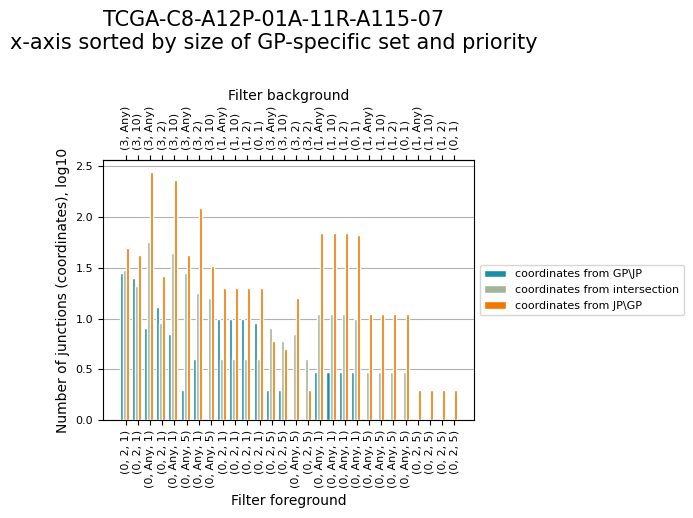

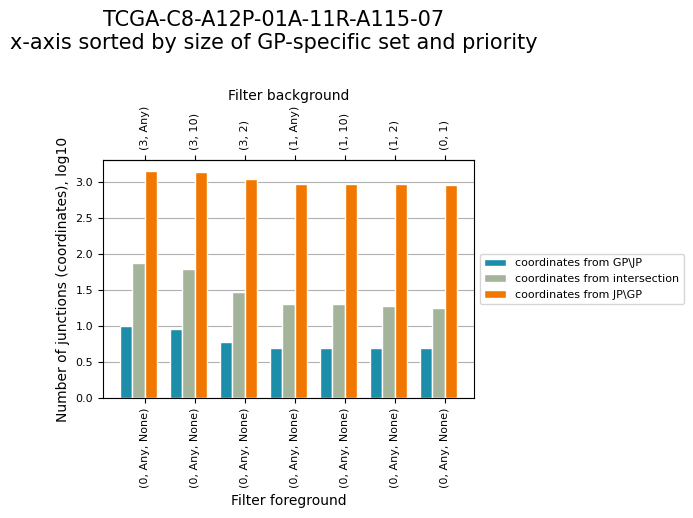

GP+P
GP+P


/cluster/customapps/biomed/grlab/users/prelotla/software/miniconda/envs/pep3/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 640x480 with 0 Axes>

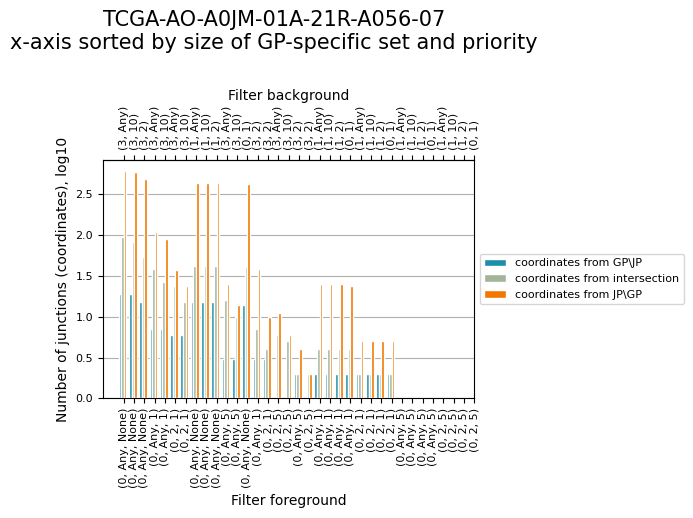

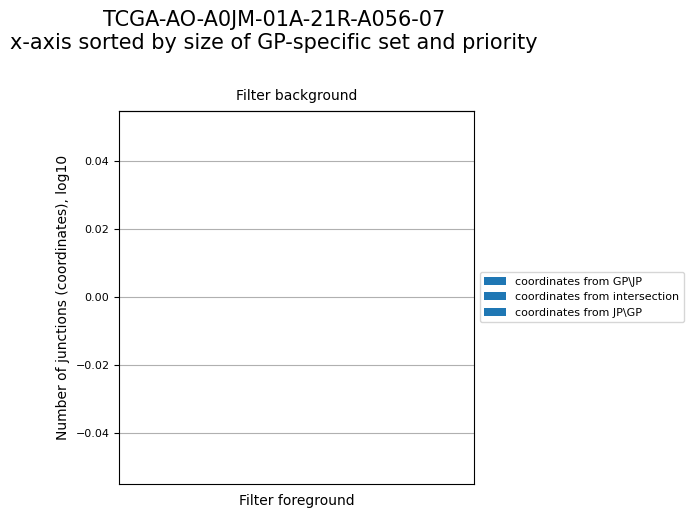

GP+P
GP+P


/cluster/customapps/biomed/grlab/users/prelotla/software/miniconda/envs/pep3/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 640x480 with 0 Axes>

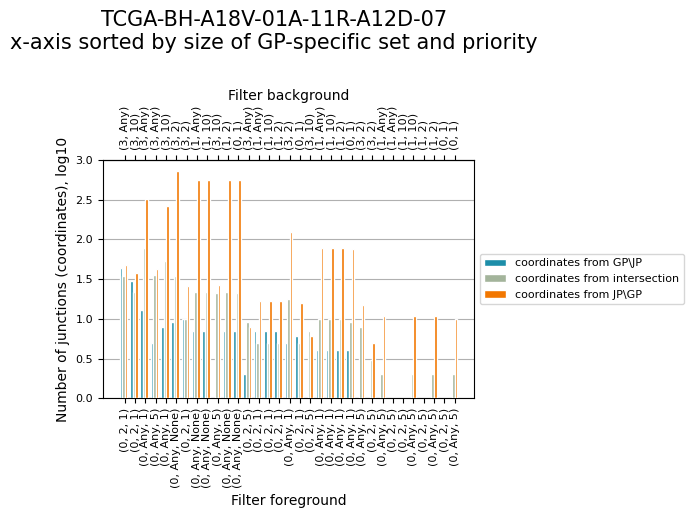

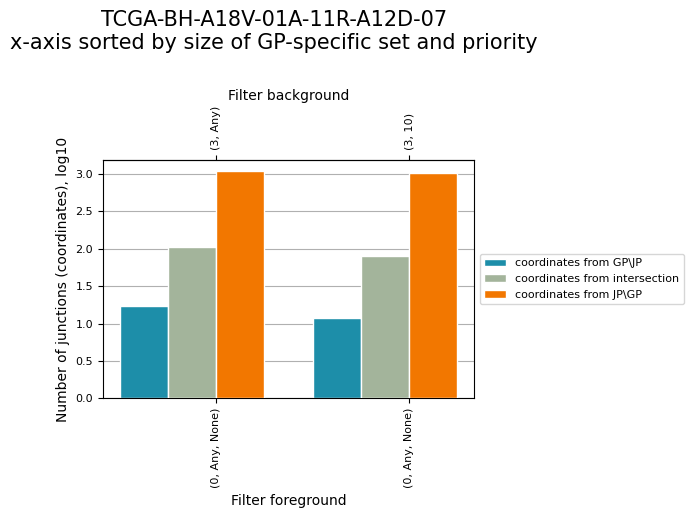

GP+P
GP+P


/cluster/customapps/biomed/grlab/users/prelotla/software/miniconda/envs/pep3/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 640x480 with 0 Axes>

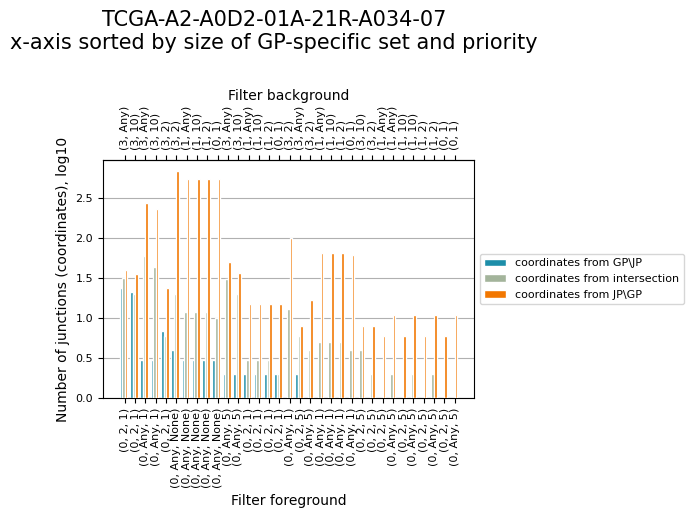

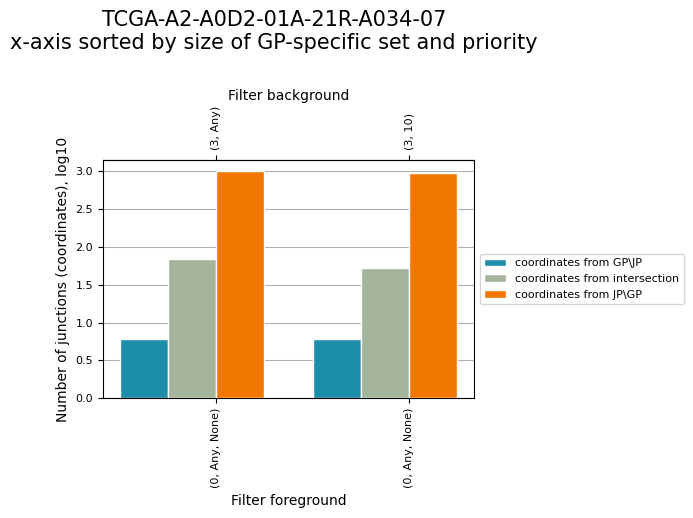

GP+P
GP+P


<Figure size 640x480 with 0 Axes>

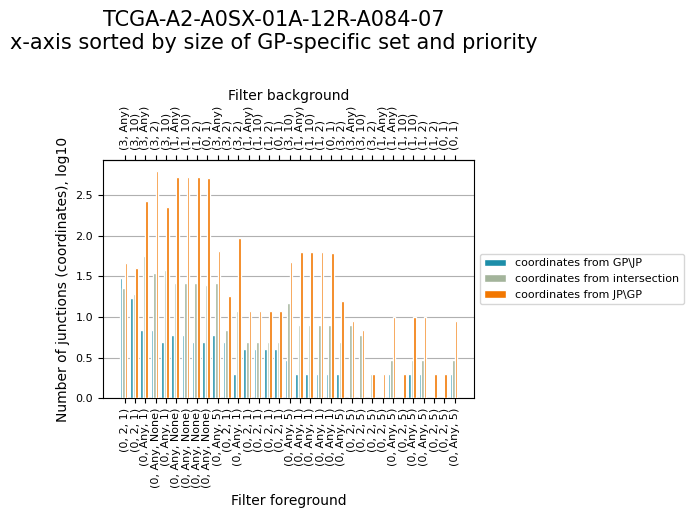

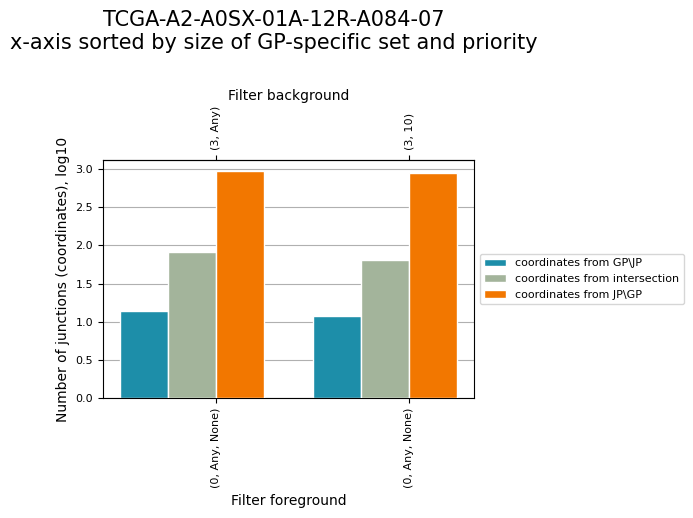

In [10]:
### WITH LOG
# Definition constants
import math

first_df=out_df_filtered
second_df=out_df_original

final_df = first_df
final_path = create_path.create_path(SAVE_DIR,[DIR_CSV,DIR_BRCA,NAME_TABLES,'OHSU_BRCA_NEW',NAME_FINAL_BRCA])

final_df.to_csv(final_path,header=True,sep='\t')
# Processing data and drawing grahs for each sample
for sample in RESTRICTS_BRCA:
    
    # Download colums from tables
    data_df=final_df.loc[final_df['sample']==sample]
    data1_df = data_df.loc[final_df['sum']<800]
    data2_df = data_df.loc[final_df['sum']>=800]
    data1_df=table_processing.sorting(data1_df)
    data2_df=table_processing.sorting(data2_df)
    inter_first=np.log10(data1_df['size_intersection_coor'])
    s_ETH_first=np.log10(data1_df['size_eth\ohsu_coor'])
    s_OHSU_first=np.log10(data1_df['size_ohsu\eth_coor'])
    filter_foreground_first = list(data1_df['filter_foreground'])
    filter_background_first = list(data1_df['filter_background'])

    inter_second=np.log10(data2_df['size_intersection_coor'])
    s_ETH_second=np.log10(data2_df['size_eth\ohsu_coor'])
    s_OHSU_second=np.log10(data2_df['size_ohsu\eth_coor'])
    filter_foreground_second = list(data2_df['filter_foreground'])
    filter_background_second = list(data2_df['filter_background'])
    
    #ySalt=''
    ySalt=", log10"
    
    l_first=len(s_ETH_first)
    l_second=len(s_ETH_second)
    filfor_first = table_processing.get_filter(filter_foreground_first)
    filbac_first = table_processing.get_filter(filter_background_first)
    filfor_second = table_processing.get_filter(filter_foreground_second)
    filbac_second = table_processing.get_filter(filter_background_second)

            
    # Combining filters for graph indexing
    
    fffb_first=[]
    for i in range(len(filfor_first)):
          fffb_first.append(filfor_first[i]+' '+filbac_first[i])
       

    fffb_second=[]
    for i in range(len(filfor_second)):
          fffb_second.append(filfor_second[i]+' '+filbac_second[i])

    
    # Frame structure building
    name = ['coordinates from GP\JP','coordinates from intersection','coordinates from JP\GP']

    v_first= [s_ETH_first,inter_first, s_OHSU_first]
    v_second=[s_ETH_second,inter_second,s_OHSU_second]

    
    lg_first = len(filfor_first)
    lg_second = len(filfor_second)
    #Plotting sample data
    
    x_main = filfor_first
    x_secondary_first = filbac_first
    x_secondary_second = filbac_second
    
    plt.figure()



    bottom_first =np.zeros(lg_first)
    bottom_second =np.zeros(lg_second)
    
    bar_width=0.5
    
    bar_position_ETH_first = range(len(s_ETH_first))
    bar_position_ETH_second = range(len(s_ETH_second))

    SALT = salt = PLOT_SORT_BY
    path_sample_m1000 =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_BRCA,NAME_SAMPLES, sample,'OHSU_BRCA_NEW', SALT,'coords',PLOT_TYPE, LOGTHM, NAME_PLOT_ABSOLUT_PRETTY_M1000+PNG])
    path_sample_l1000 =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_BRCA,NAME_SAMPLES, sample,'OHSU_BRCA_NEW', SALT,'coords',PLOT_TYPE,LOGTHM, NAME_PLOT_ABSOLUT_PRETTY_L1000+PNG])
    path_sample_m1000_pdf =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_BRCA,NAME_SAMPLES, sample,'OHSU_BRCA_NEW', SALT,'coords',PLOT_TYPE,LOGTHM, NAME_PLOT_ABSOLUT_PRETTY_M1000+PDF])
    path_sample_nf_pdf =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_BRCA,NAME_SAMPLES, sample,'OHSU_BRCA_NEW', SALT,'coords',PLOT_TYPE,LOGTHM, NAME_PLOT_ABSOLUT_PRETTY_NF+PDF])

    draw_plot.plotting_filtering_barplot(fffb_first,v_first,name,bottom_first,bar_position_ETH_first,sample,filfor_first,x_secondary_first,salt,path_sample_m1000,path_sample_m1000_pdf, ySalt=ySalt)
    

    draw_plot.plotting_filtering_barplot(fffb_second,v_second,name,bottom_second,bar_position_ETH_second,sample,filfor_second,x_secondary_second,salt,path_sample_l1000,path_sample_l1000_pdf, ySalt=ySalt)


<a name='6'></a>
## Building plots for story of coordinates

Extracts unique samples from a DataFrame called diff_tab. Filters out specific rows from this DataFrame based on the current sample in the loop. Sorts the data using custom sorting functions applied to two separate subsets of the data, named df_JP and df_GP, possibly representing different groups or types of samples. Retrieves filter values for each group from the 'filter' column. Creates lists for further manipulation, with prefixes like FF_ and FB_, potentially representing different conditions or classifications within each group. Calculates bar positions for plotting, which will likely be used to determine where bars should be placed on a bar chart. Generates file paths for saving the plots, using a custom create_path function, which combines several variables to form the full path. Calls custom plotting functions to generate plots for each group and saves the figures as PDFs.

/cluster/home/prelotla/github/projects2020_ohsu/eth/MY_Master_thesis_rerun_LP/TASKS/func/functions/table_processing.py:204: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['foreground_pattern']  = [i[0:3] for i in df['filter'].values]
/cluster/home/prelotla/github/projects2020_ohsu/eth/MY_Master_thesis_rerun_LP/TASKS/func/functions/table_processing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['background_pattern']  = [i[3:5] for i in df['filter'].values]
/cluster/customapps/biomed/grlab/users/p

<Figure size 640x480 with 0 Axes>

<Figure size 1600x1000 with 0 Axes>

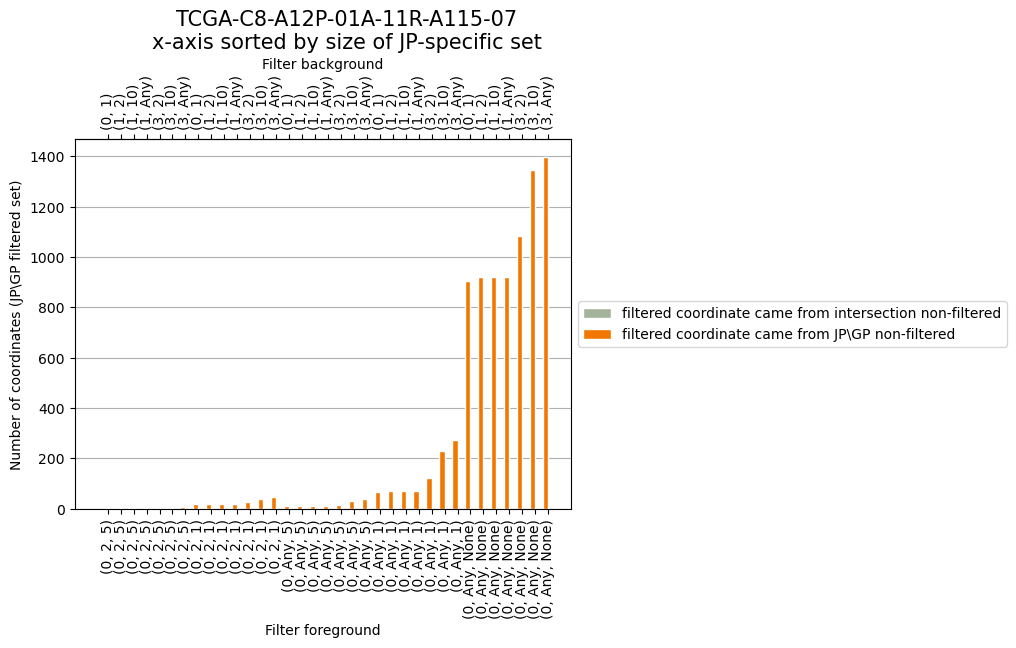

<Figure size 1600x1000 with 0 Axes>

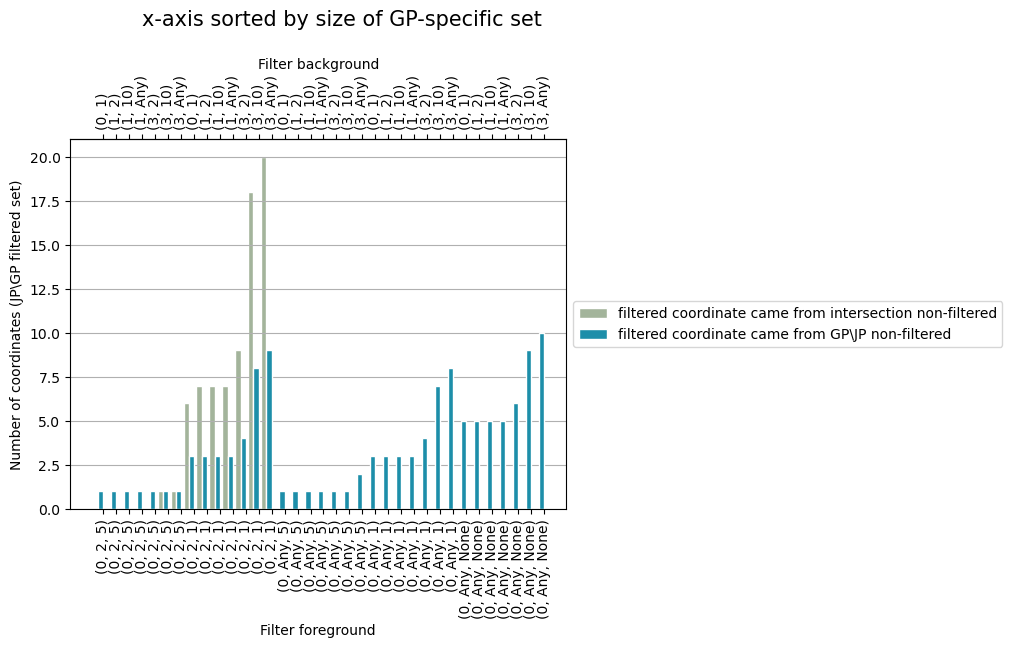

/cluster/home/prelotla/github/projects2020_ohsu/eth/MY_Master_thesis_rerun_LP/TASKS/func/functions/table_processing.py:204: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['foreground_pattern']  = [i[0:3] for i in df['filter'].values]
/cluster/home/prelotla/github/projects2020_ohsu/eth/MY_Master_thesis_rerun_LP/TASKS/func/functions/table_processing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['background_pattern']  = [i[3:5] for i in df['filter'].values]
/cluster/customapps/biomed/grlab/users/p

<Figure size 640x480 with 0 Axes>

<Figure size 1600x1000 with 0 Axes>

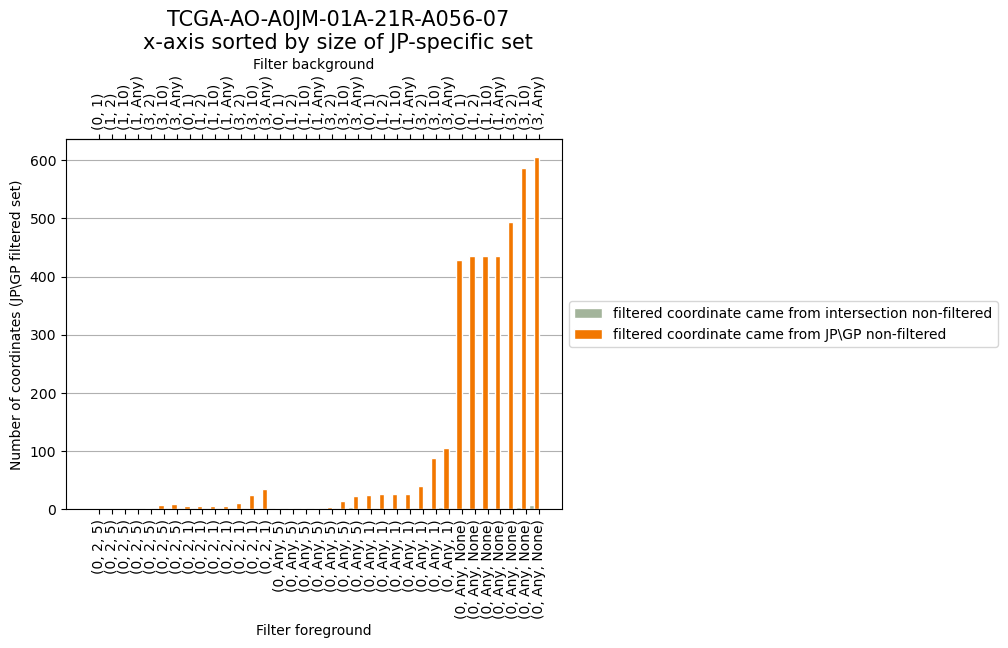

<Figure size 1600x1000 with 0 Axes>

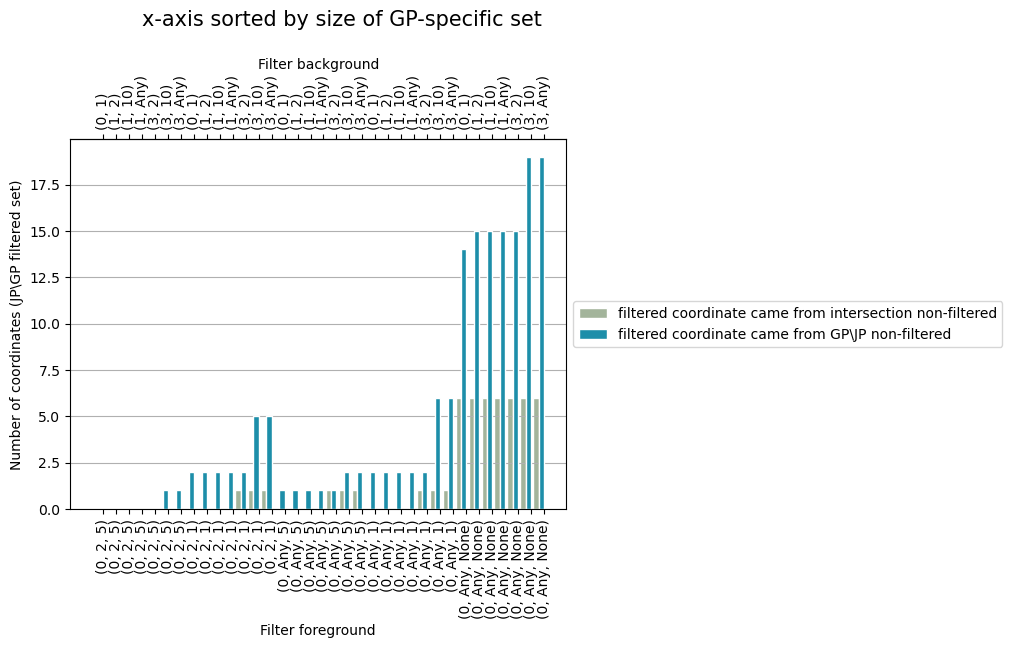

/cluster/home/prelotla/github/projects2020_ohsu/eth/MY_Master_thesis_rerun_LP/TASKS/func/functions/table_processing.py:204: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['foreground_pattern']  = [i[0:3] for i in df['filter'].values]
/cluster/home/prelotla/github/projects2020_ohsu/eth/MY_Master_thesis_rerun_LP/TASKS/func/functions/table_processing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['background_pattern']  = [i[3:5] for i in df['filter'].values]
/cluster/customapps/biomed/grlab/users/p

<Figure size 640x480 with 0 Axes>

<Figure size 1600x1000 with 0 Axes>

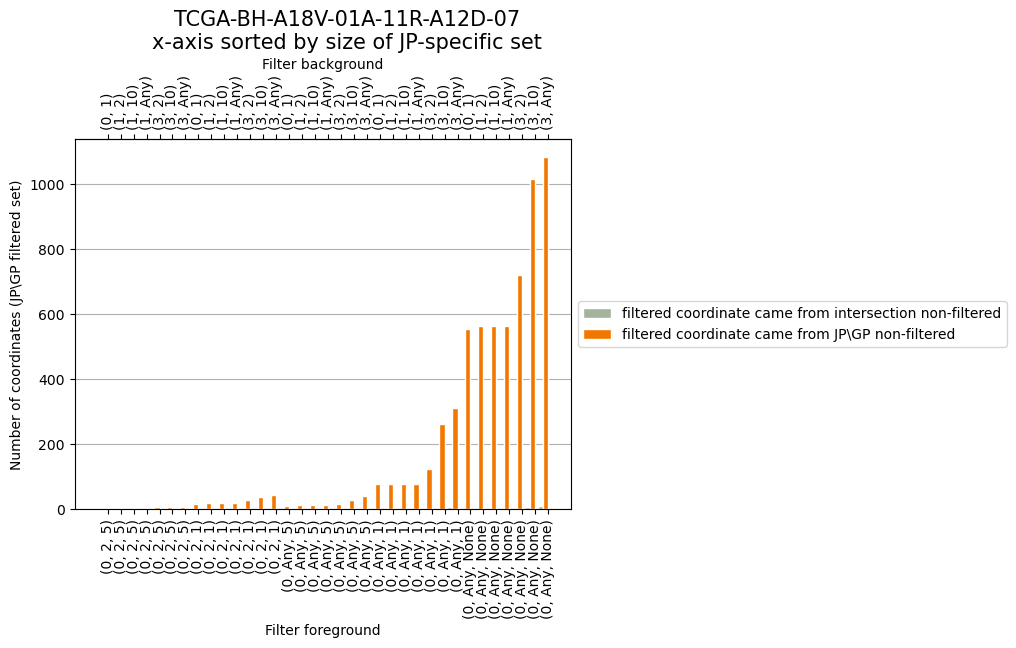

<Figure size 1600x1000 with 0 Axes>

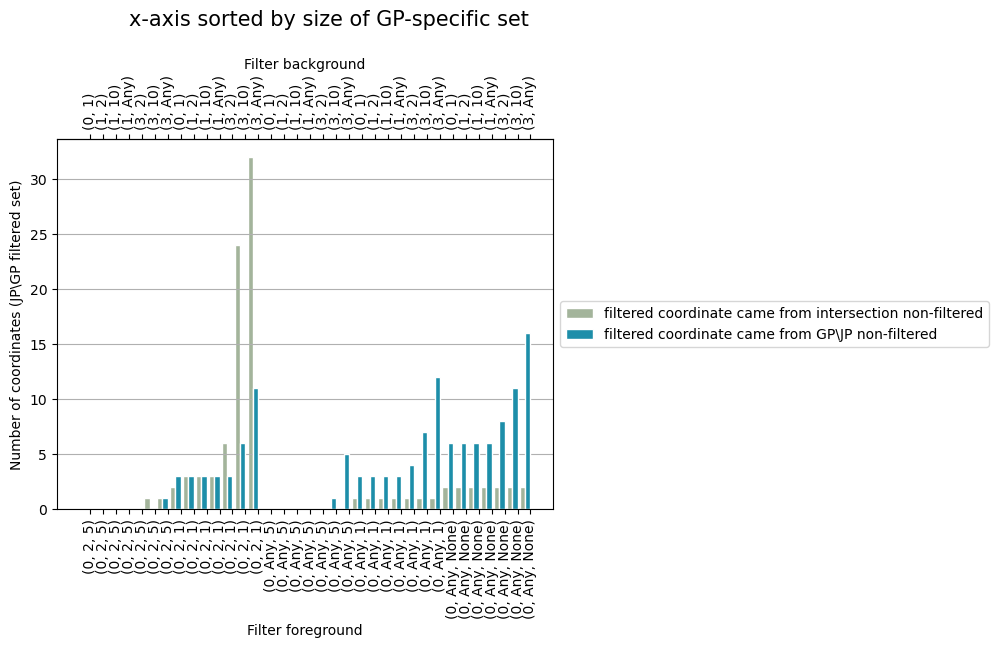

/cluster/home/prelotla/github/projects2020_ohsu/eth/MY_Master_thesis_rerun_LP/TASKS/func/functions/table_processing.py:204: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['foreground_pattern']  = [i[0:3] for i in df['filter'].values]
/cluster/home/prelotla/github/projects2020_ohsu/eth/MY_Master_thesis_rerun_LP/TASKS/func/functions/table_processing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['background_pattern']  = [i[3:5] for i in df['filter'].values]
/cluster/customapps/biomed/grlab/users/p

<Figure size 640x480 with 0 Axes>

<Figure size 1600x1000 with 0 Axes>

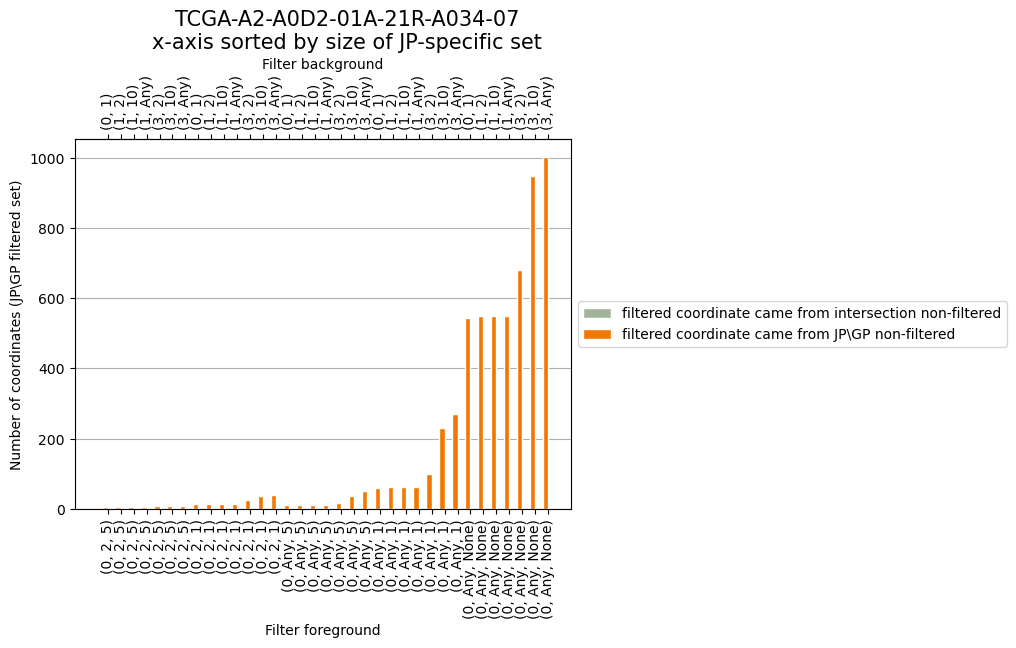

<Figure size 1600x1000 with 0 Axes>

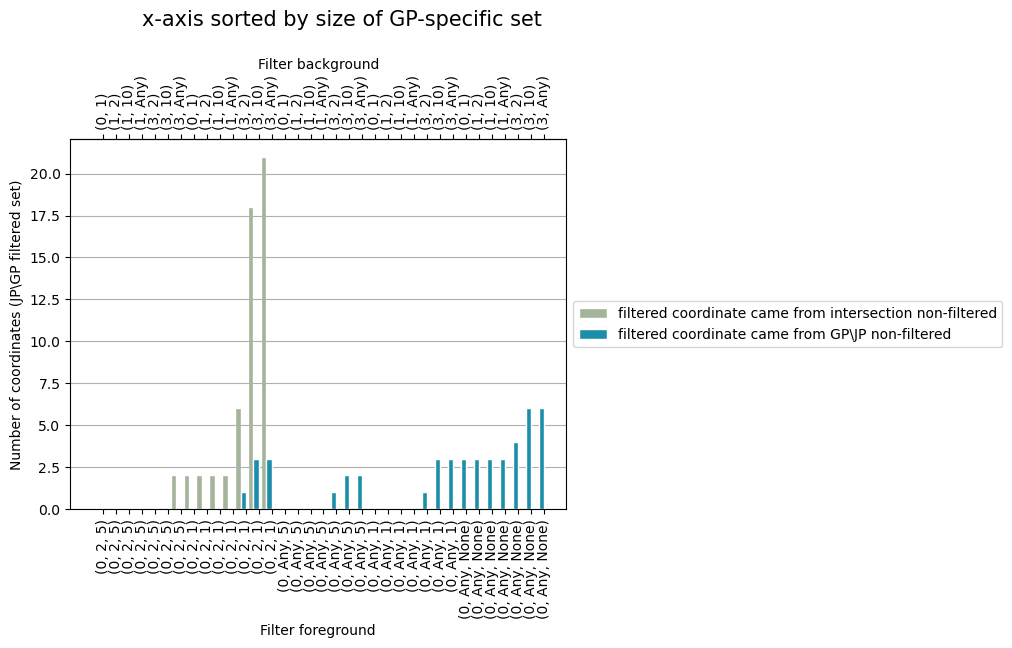

/cluster/home/prelotla/github/projects2020_ohsu/eth/MY_Master_thesis_rerun_LP/TASKS/func/functions/table_processing.py:204: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['foreground_pattern']  = [i[0:3] for i in df['filter'].values]
/cluster/home/prelotla/github/projects2020_ohsu/eth/MY_Master_thesis_rerun_LP/TASKS/func/functions/table_processing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['background_pattern']  = [i[3:5] for i in df['filter'].values]
/cluster/customapps/biomed/grlab/users/p

<Figure size 640x480 with 0 Axes>

<Figure size 1600x1000 with 0 Axes>

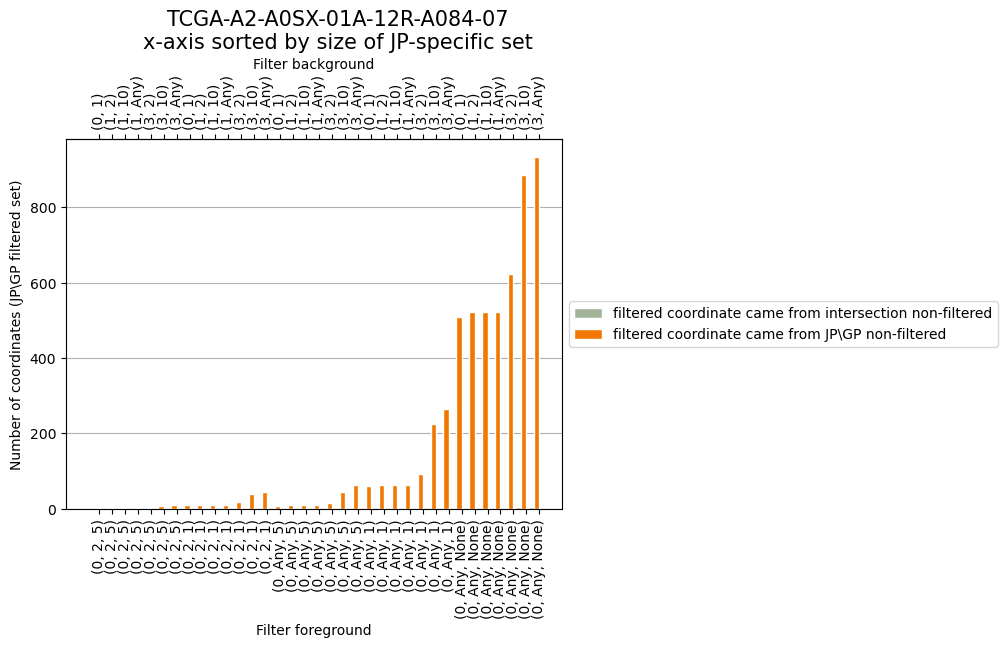

<Figure size 1600x1000 with 0 Axes>

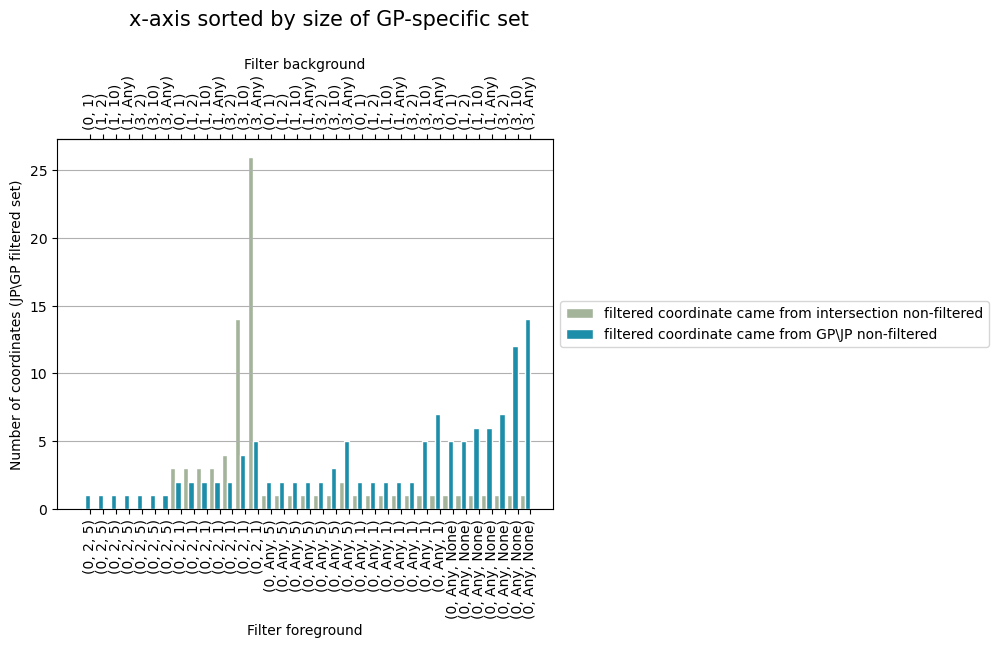

In [11]:
restricts = diff_tab['sample'].unique()
for sample in restricts:
    samples_table = diff_tab.loc[diff_tab['sample']==sample]
    
    df_JP=samples_table
    df_GP=samples_table
#     df_JP=table_processing.sorting_JP(df_JP)
#     df_GP=table_processing.sorting_GP(df_GP)
    df_JP = table_processing.sort_filters(df_JP, order_background, order_foreground)
    df_GP = table_processing.sort_filters(df_GP, order_background, order_foreground)
    
    
    FILTER_JP=df_JP['filter']
    FILTER_GP=df_GP['filter']

    
    JP_INTER_NF=df_JP['JP from Inter NF']
    JP_JP_NF=df_JP['JP from JP NF']
    GP_INTER_NF=df_GP['GP from Inter NF']
    GP_GP_NF=df_GP['GP from GP NF']

    
    FF_JP=df_JP['ff']
    FB_JP=df_JP['fb']
    FF_GP=df_GP['ff']
    FB_GP=df_GP['fb']

    
    bar_position_JP=range(len(FF_JP))
    bar_position_GP=range(len(FF_GP))

    
    path_sample_JP =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_BRCA,NAME_SAMPLES, sample,'OHSU_BRCA_NEW', SALT,'coords',PLOT_TYPE, NAME_PLOT_JP+PNG])
    path_sample_JP_pdf =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_BRCA,NAME_SAMPLES, sample,'OHSU_BRCA_NEW', SALT,'coords',PLOT_TYPE, NAME_PLOT_JP+PDF])
    path_sample_GP =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_BRCA,NAME_SAMPLES, sample,'OHSU_BRCA_NEW', SALT,'coords',PLOT_TYPE, NAME_PLOT_GP+PNG])
    path_sample_GP_pdf =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_BRCA,NAME_SAMPLES, sample,'OHSU_BRCA_NEW', SALT,'coords',PLOT_TYPE, NAME_PLOT_GP+PDF])
        
    # print(filters)
    plt.figure()


    draw_plot.plotting_JP_GP(FILTER_JP,JP_INTER_NF,JP_JP_NF,sample,bar_position_JP,FF_JP,FB_JP,path_sample_JP,path_sample_JP_pdf)
    draw_plot.plotting_JP_GP(FILTER_GP,GP_INTER_NF,GP_GP_NF,sample,bar_position_GP,FF_GP,FB_GP,path_sample_GP,path_sample_GP_pdf,JP=False)

<a name='7'></a>
## Building plots for story of coordinates with log10

/cluster/customapps/biomed/grlab/users/prelotla/software/miniconda/envs/pep3/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 640x480 with 0 Axes>

<Figure size 1600x1000 with 0 Axes>

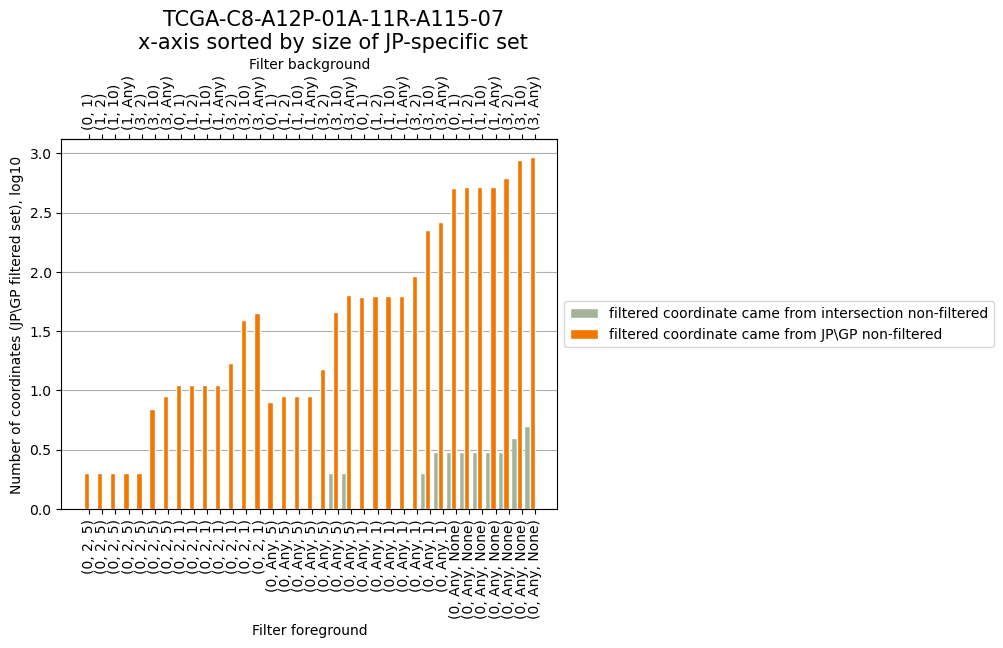

<Figure size 640x480 with 0 Axes>

<Figure size 1600x1000 with 0 Axes>

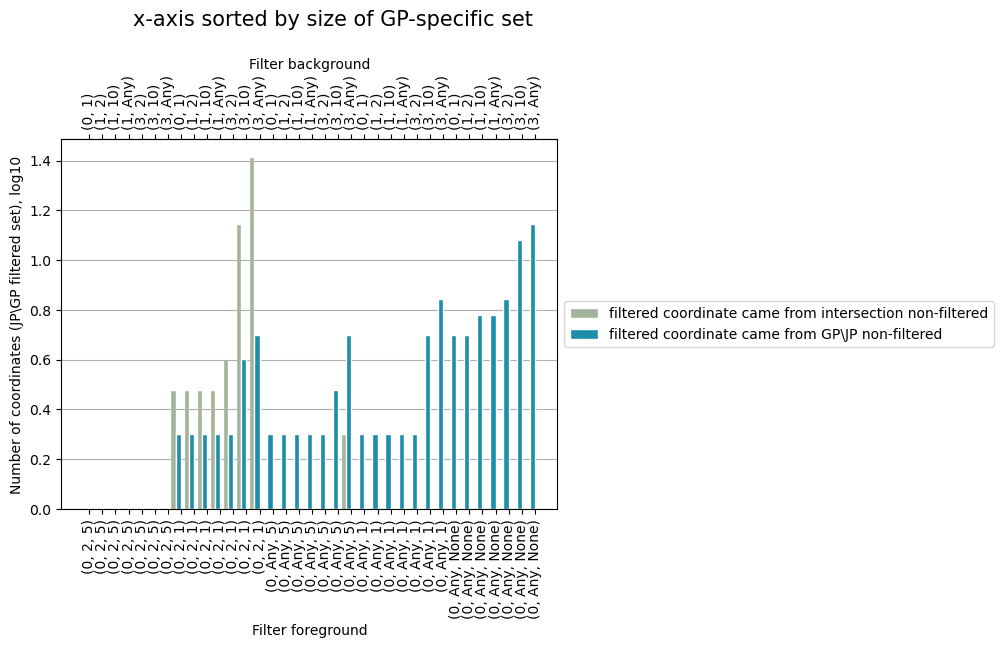

/cluster/customapps/biomed/grlab/users/prelotla/software/miniconda/envs/pep3/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 640x480 with 0 Axes>

<Figure size 1600x1000 with 0 Axes>

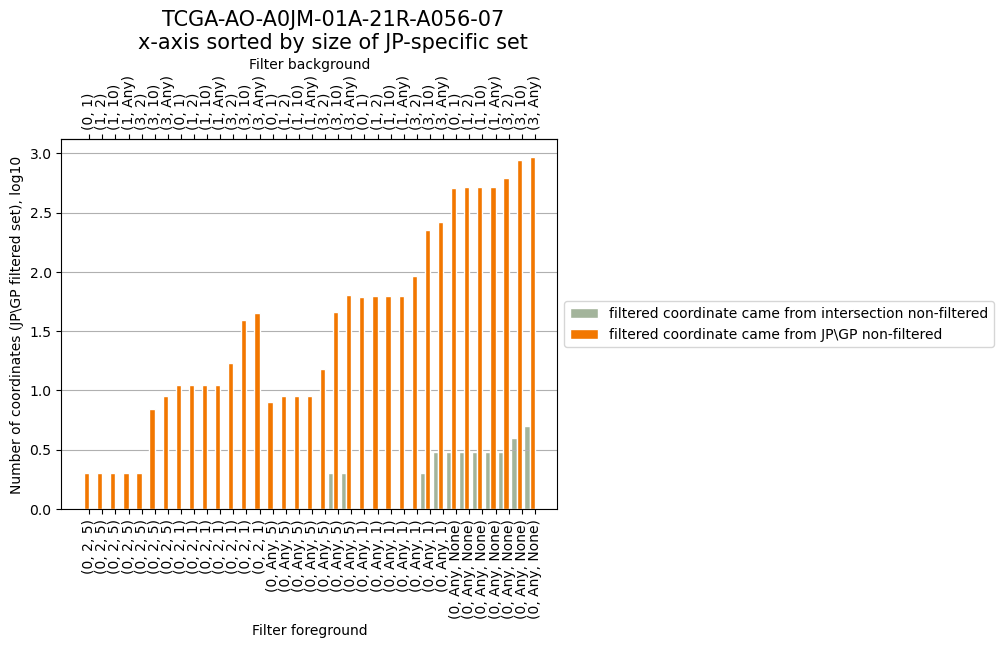

<Figure size 640x480 with 0 Axes>

<Figure size 1600x1000 with 0 Axes>

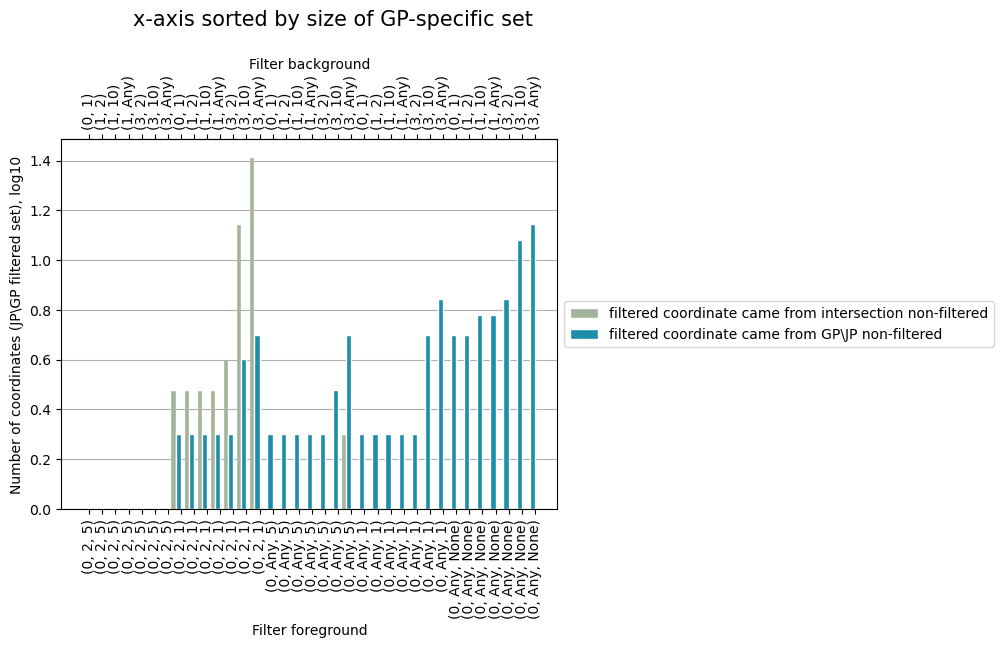

/cluster/customapps/biomed/grlab/users/prelotla/software/miniconda/envs/pep3/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 640x480 with 0 Axes>

<Figure size 1600x1000 with 0 Axes>

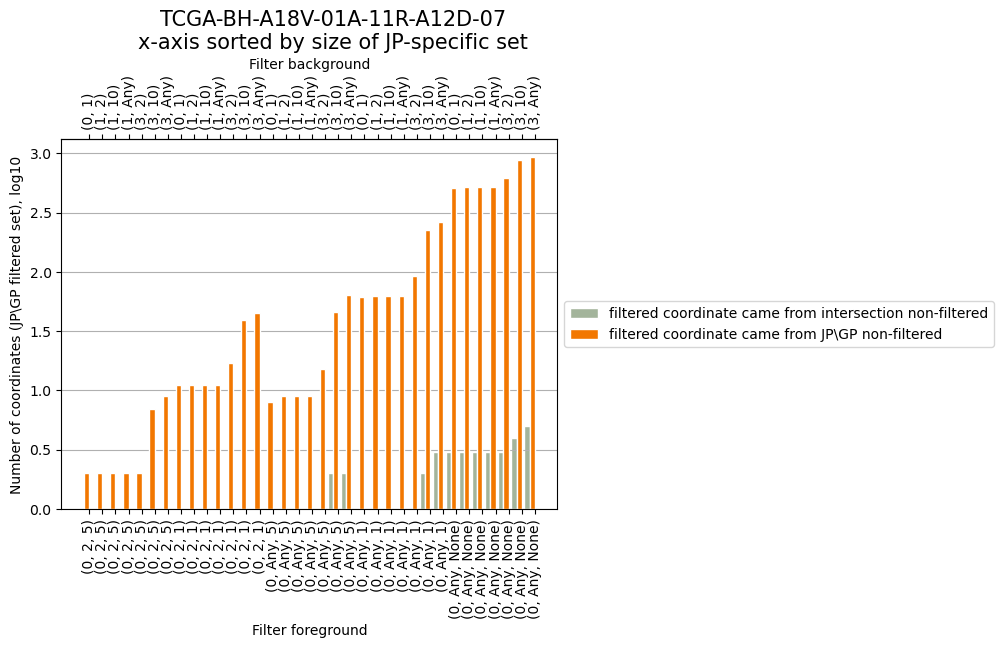

<Figure size 640x480 with 0 Axes>

<Figure size 1600x1000 with 0 Axes>

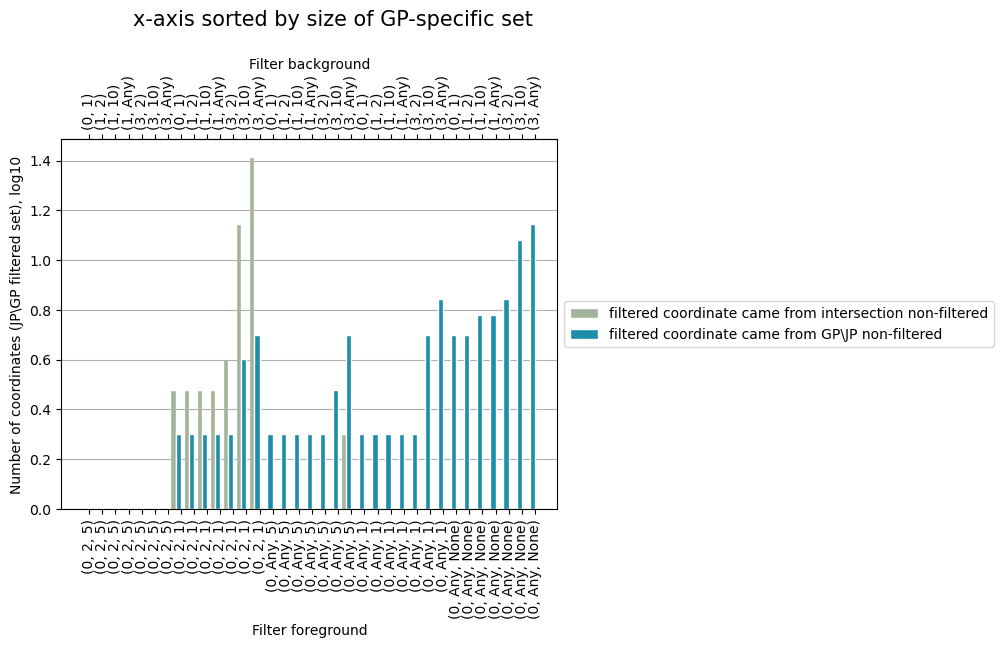

/cluster/customapps/biomed/grlab/users/prelotla/software/miniconda/envs/pep3/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 640x480 with 0 Axes>

<Figure size 1600x1000 with 0 Axes>

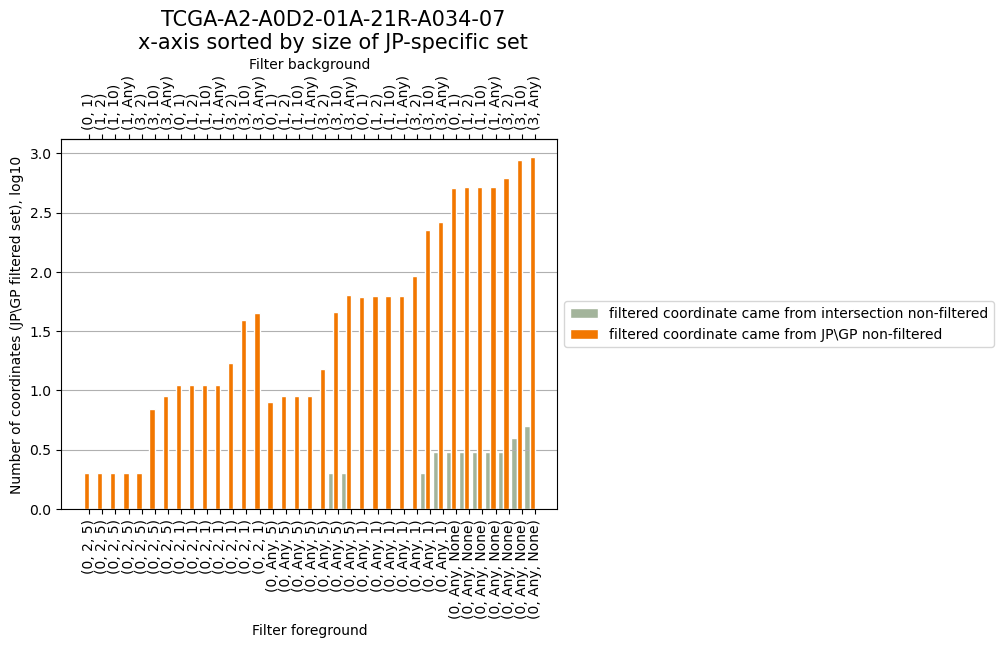

<Figure size 640x480 with 0 Axes>

<Figure size 1600x1000 with 0 Axes>

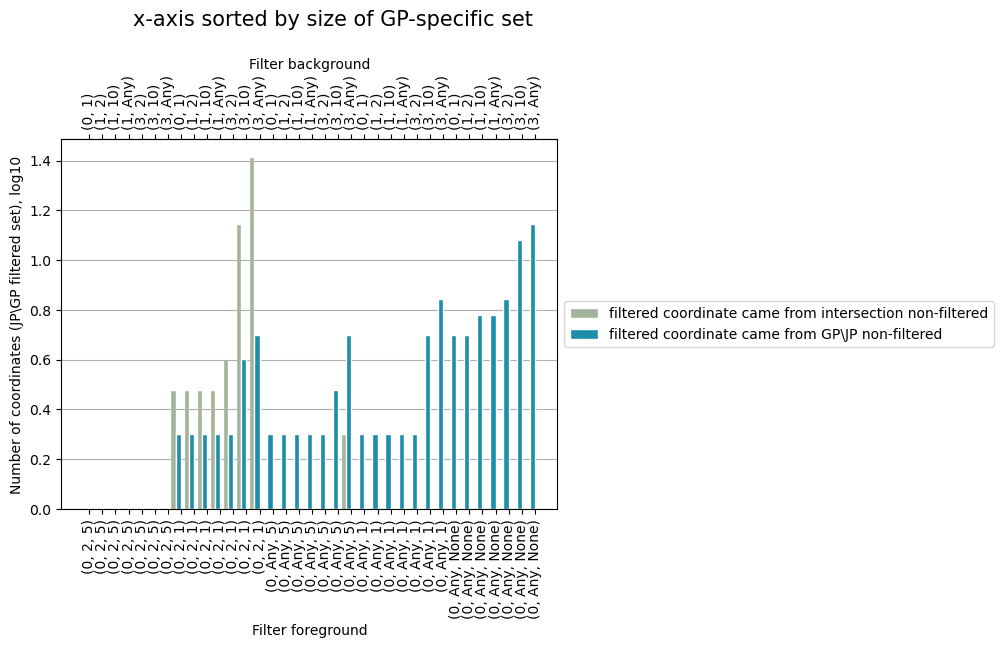

/cluster/customapps/biomed/grlab/users/prelotla/software/miniconda/envs/pep3/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 640x480 with 0 Axes>

<Figure size 1600x1000 with 0 Axes>

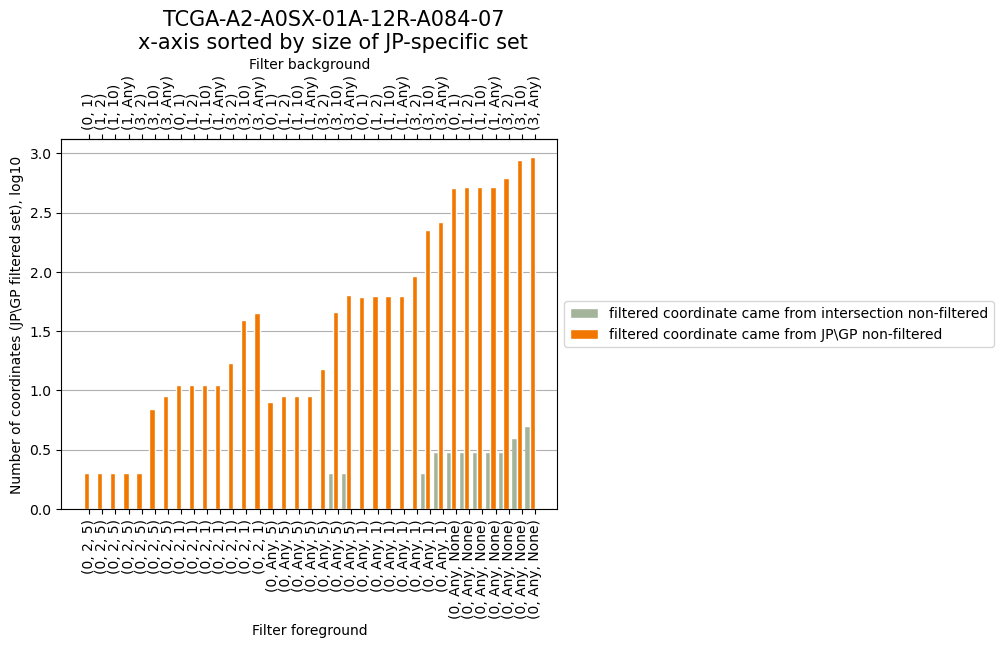

<Figure size 640x480 with 0 Axes>

<Figure size 1600x1000 with 0 Axes>

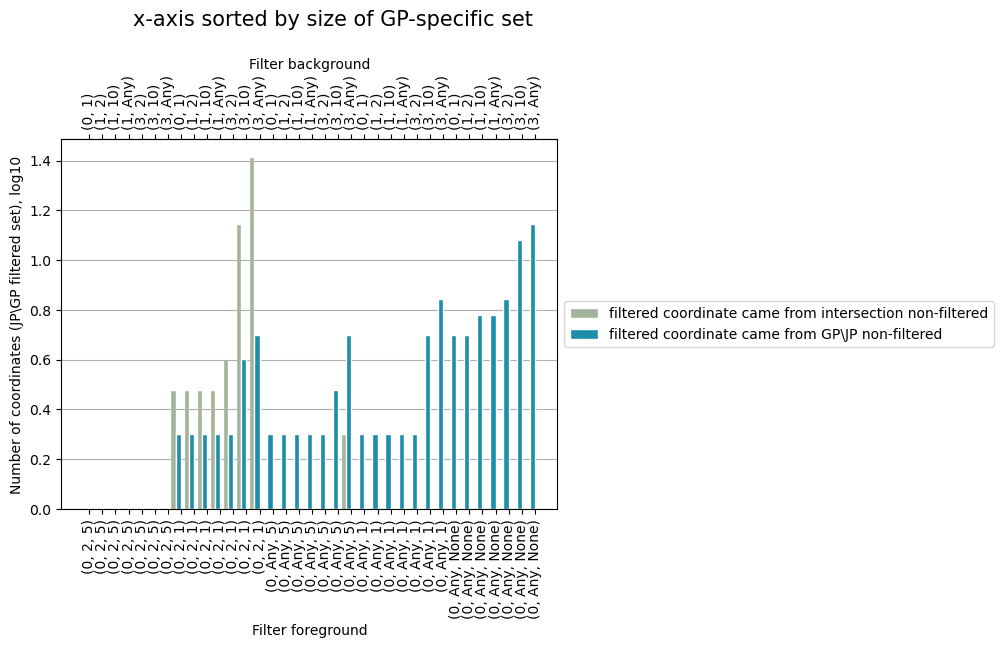

In [12]:
# WITH LOG 
restricts = diff_tab['sample'].unique()
for sample in restricts:
    samples_table = diff_tab.loc[diff_tab['sample']==sample]
    
    #df_JP=table_processing.sorting_JP(samples_table)
    #df_GP=table_processing.sorting_GP(samples_table)
    df_JP = table_processing.sort_filters(df_JP, order_background, order_foreground)
    df_GP = table_processing.sort_filters(df_GP, order_background, order_foreground)
    
    
    FILTER_JP=df_JP['filter']
    FILTER_GP=df_GP['filter']

    
    JP_INTER_NF=np.log10(df_JP['JP from Inter NF'])
    JP_JP_NF=np.log10(df_JP['JP from JP NF'])
    GP_INTER_NF=np.log10(df_GP['GP from Inter NF'])
    GP_GP_NF=np.log10(df_GP['GP from GP NF'])

    
    FF_JP=df_JP['ff']
    FB_JP=df_JP['fb']
    FF_GP=df_GP['ff']
    FB_GP=df_GP['fb']

    
    bar_position_JP=range(len(FF_JP))
    bar_position_GP=range(len(FF_GP))

    
    path_sample_JP =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_BRCA,NAME_SAMPLES, sample,'OHSU_BRCA_NEW', SALT,'coords',PLOT_TYPE, NAME_PLOT_JP+PNG])
    path_sample_JP_pdf =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_BRCA,NAME_SAMPLES, sample,'OHSU_BRCA_NEW', SALT,'coords',PLOT_TYPE, NAME_PLOT_JP+PDF])
    path_sample_GP =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_BRCA,NAME_SAMPLES, sample,'OHSU_BRCA_NEW', SALT,'coords',PLOT_TYPE, NAME_PLOT_GP+PNG])
    path_sample_GP_pdf =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_BRCA,NAME_SAMPLES, sample,'OHSU_BRCA_NEW', SALT,'coords',PLOT_TYPE, NAME_PLOT_GP+PDF])
        
    # print(filters)
    plt.figure()
    draw_plot.plotting_JP_GP(FILTER_JP,JP_INTER_NF,JP_JP_NF,sample,bar_position_JP,FF_JP,FB_JP,path_sample_JP,path_sample_JP_pdf,ySalt=', log10')

    plt.figure()
    draw_plot.plotting_JP_GP(FILTER_GP,GP_INTER_NF,GP_GP_NF,sample,bar_position_GP,FF_GP,FB_GP,path_sample_GP,path_sample_GP_pdf,JP=False,ySalt=', log10')

<a name='8'></a>
## Story of coordinates audit

Selects subsets of data from two DataFrames out_df_filtered and out_df_original based on the sample identifier 'TCGAA00JMO1A21RA05607'. Retrieves specific columns from these subsets, which may represent coordinates or other types of genomic or biomedical data. Conducts a series of string replacements and splits on these columns to clean or reformat the data. Computes the lengths of the processed data lists, which may be used to quantify the data or for subsequent analysis. Prints out the lengths of these lists, providing a simple textual output that indicates the size of the data subsets related to the OHSU and ETH identifiers within the context of the analysis.

In [13]:
data_fil=out_df_filtered
data_nf=out_df_original
OSHU=data_fil['ohsu_coor\eth_coor'].loc[(out_df_filtered['sample']=='TCGAAOA0JM01A21RA05607')]
ETH=data_fil['eth_coor\ohsu_coor'].loc[(out_df_filtered['sample']=='TCGAAOA0JM01A21RA05607')]
inter2_df=data_nf['inter_coor'].loc[(out_df_original['sample']=='TCGAAOA0JM01A21RA05607')]
OHSU_2_df=data_nf['ohsu_coor\eth_coor'].loc[(out_df_original['sample']=='TCGAAOA0JM01A21RA05607')]
ETH_2_df=data_nf['eth_coor\ohsu_coor'].loc[(out_df_original['sample']=='TCGAAOA0JM01A21RA05607')]
inter_nf=inter2_df.iloc[0]
ohsu_nf=OHSU_2_df.iloc[0]
eth_nf=ETH_2_df.iloc[0]
inter_nf=inter_nf.replace('"','').replace("[","").replace("]","").replace("'","").split(', ')
ohsu_nf=ohsu_nf.replace('"','').replace("{","").replace("}","").replace("'","").split(', ')
eth_nf=eth_nf.replace('"','').replace("{","").replace("}","").replace("'","").split(', ')
eth_nf=table_processing.separate_ETH_3exons(eth_nf) # Make a correction on ETH - ISSUE THE intersection non filtered is not fully correct

len_ohsu = [ohsu_list.replace('"','').replace("{","").replace("}","").replace("'","").split(', ') for ohsu_list in OSHU]
len_eth = [eth_list.replace('"','').replace("{","").replace("}","").replace("'","").split(', ') for eth_list in ETH]
for ohsu in len_ohsu:
    print(f"len ohsu {len(ohsu)},\tfrom OHSU NF{len(set(ohsu) & set(ohsu_nf))},\tfrom INTER NF {len(set(ohsu) & set(inter_nf))},\tfrom ETH NF {len(set(ohsu) & set(eth_nf))}")
print(TT)
for eth in len_eth:
    print(f"len eth {len(eth)},\tfrom OHSU NF {len(set(eth) & set(ohsu_nf))},\tfrom INTER NF {len(set(eth) & set(inter_nf))},\tfrom ETH NF {len(set(eth) & set(eth_nf))}")

len ohsu 25,	from OHSU NF25,	from INTER NF 0,	from ETH NF 0
len ohsu 436,	from OHSU NF435,	from INTER NF 1,	from ETH NF 0
len ohsu 1,	from OHSU NF0,	from INTER NF 0,	from ETH NF 0
len ohsu 436,	from OHSU NF435,	from INTER NF 1,	from ETH NF 0
len ohsu 436,	from OHSU NF435,	from INTER NF 1,	from ETH NF 0
len ohsu 1,	from OHSU NF1,	from INTER NF 0,	from ETH NF 0
len ohsu 89,	from OHSU NF87,	from INTER NF 2,	from ETH NF 0
len ohsu 591,	from OHSU NF587,	from INTER NF 4,	from ETH NF 0
len ohsu 14,	from OHSU NF13,	from INTER NF 1,	from ETH NF 0
len ohsu 612,	from OHSU NF606,	from INTER NF 6,	from ETH NF 0
len ohsu 5,	from OHSU NF5,	from INTER NF 0,	from ETH NF 0
len ohsu 11,	from OHSU NF9,	from INTER NF 2,	from ETH NF 0
len ohsu 5,	from OHSU NF5,	from INTER NF 0,	from ETH NF 0
len ohsu 2,	from OHSU NF2,	from INTER NF 0,	from ETH NF 0
len ohsu 4,	from OHSU NF4,	from INTER NF 0,	from ETH NF 0
len ohsu 24,	from OHSU NF24,	from INTER NF 0,	from ETH NF 0
len ohsu 5,	from OHSU NF5,	from INTER NF 0,

In [14]:
diff_tab.to_csv('story_of_coords.csv')